
* **Описание проекта:**
Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов. Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

# **Выполненные шаги предобработки данных:**



* Загрузка и первичный осмотр датасета  
* Переименование переменных для повышения читаемости  
* Создание новых признаков  
* Приведение данных к единому формату  
* Обработка категориальных переменных: стандартизация значений, лемматизация текста, кластеризация целей кредита методом Kmeans
* Кодирование категориальных признаков  
* Категоризация числовых переменных  
* Разметка данных по заданным условиям  
* Проведение визуального анализа распределения переменных  
* Комплексная предобработка: фильтрация, импутация и коррекция выбросов методом случайного леса



# **Вывод и аналитическая справка**

**Тема:** Факторы, влияющие на возврат кредита в срок (наличие детей, семейный статус, уровень дохода, цель кредита)
**Источник данных:** Обезличенные данные клиентов (N = 20,897)  
**Методы анализа:** Z-тест пропорций, χ²-тест независимости, визуализация (столбчатые графики, тепловые карты), анализ распределений

---

1. **Наличие детей и возврат кредита**

**Результаты:**
- Клиенты с детьми имеют **9.33%** просрочек, без детей — **7.67%**
- Z-статистика: **-4.132**, p-value: **< 0.001**

**Вывод:**
Наличие детей статистически значимо связано с более высоким уровнем просрочек. Этот показатель может быть использован как **индикатор повышенного кредитного риска**, особенно в сочетании с другими характеристиками (например, уровень дохода, семейное положение). Следует учитывать, что наличие детей — **не причина**, а маркер возможной финансовой нагрузки.

---

2. **Семейное положение и возврат кредита**

**Результаты:**
- С официальным статусом (брак, развод, вдовство): **7.59%** просрочек
- Без официального статуса (гражданский брак, одинокие): **9.58%**
- Z-статистика: **-4.902**, p-value: **< 0.001**

 **Вывод:**
Клиенты без официального семейного статуса демонстрируют **значимо более высокий уровень просрочек**. Формально оформленные отношения могут выступать как **косвенный предиктор** надёжности — вероятно, отражают устойчивость и ответственность.

**Рекомендация:**  
Учитывать статус как дополнительный фактор при скоринге, особенно при отсутствии прямых данных о кредитной истории. Для групп повышенного риска — рассматривать дополнительные условия кредитования.

---

 3. **Цель кредита и возврат**

 **Категории:** Автомобиль, Недвижимость, Образование, Свадьба  
 **χ²-статистика:** 24.104, p-value: < 0.001

 **Интерпретация:**
| Цель         | Просрочек (откл. от ожид.) | Вывод                  |
|--------------|-----------------------------|------------------------|
| Автомобиль   | +47.9                       | Повышенный риск        |
| Недвижимость | -86.9                       | Надёжный сегмент       |
| Образование  | +45.9                       | Риск, особенно у молодёжи |
| Свадьба      | ≈0                          | Нейтрально             |

 **Вывод:**
**Цель кредита — значимый поведенческий предиктор.** Особенно важно учитывать рискованные категории (автомобиль, образование) при разработке кредитных продуктов.

 **Рекомендация:**  
Добавить цель кредита в скоринговую модель. Возможно — ввести **дифференцированную ставку** в зависимости от цели займа.

---

 4. **Уровень дохода и возврат кредита**

 **χ²-статистика:** 12.802, p-value: 0.012  
 **Максимум просрочек:** у клиентов со **средним доходом** (9.24%)  
 **Минимум:** у клиентов с **очень высоким доходом** (7.13%)

 **Аномальные отклонения:**
- Средний доход: +41.6 просрочек — **рискованная категория**
- Очень высокий доход: -46.4 — **надёжная группа**

 **Вывод:**
Зависимость между уровнем дохода и возвратом кредита **нелинейная**. Средний доход не гарантирует надёжность — возможно, клиенты переоценивают свои финансовые возможности.

**Рекомендация:**
Внедрить **сегментный подход** — анализировать поведение заемщиков по уровням дохода отдельно. Клиенты среднего сегмента могут быть недооценены в классических моделях оценки риска.

---

5. **Дополнительные наблюдения:**

- Значения коэффициентов корреляций между переменными и целевой переменной **низкие**. Однако категориальные переменные (дети, семья, цель) всё же **демонстрируют значимую связь**, подтверждённую статистическими тестами.
- В данных наблюдается **дисбаланс по категориям** (например, редкие значения: 2+ детей, вдовство и т.п.). Это важно учитывать при построении моделей — редкие группы часто **ошибочно классифицируются как шум** и требуют особой обработки (агрегация, oversampling, Bayesian подходы и др.).

---

###  Общий вывод:

На основании анализа можно утверждать, что:
- **Наличие детей**, **неофициальное семейное положение**, определённые **цели кредита** (особенно "автомобиль", "образование") и **уровень дохода** — статистически значимо связаны с риском просрочки.
- Эти переменные могут и должны быть учтены в **кредитных скоринговых моделях**, а также в **разработке политики риск-менеджмента** (тарифы, лимиты, условия).

---


In [ ]:
########################################################################################################

# **Описание задания**



**Предобработка данных**  

**Пропущенные значения**  
- Какие пропущенные значения были обнаружены?  
- Возможные причины появления пропусков в данных.  
- По какому принципу заполнены пропуски?  

**Замена вещественного типа данных на целочисленный**  
- Выбор метода для изменения типа данных.  

**Дубликаты**  
- Выбор метода для поиска и удаления дубликатов в данных.  
- Возможные причины появления дубликатов.  

**Выделение леммы в значениях столбца с целями получения кредита**  
- Описание лемматизации целей кредита.  

**Категоризация данных**  
- Какие «словари» выделены для этого набора данных и почему?  

В данных могут встречаться **артефакты** — значения, которые не отражают действительность. Например, отрицательное количество дней трудового стажа. Для реальных данных это нормально. Нужно описать возможные причины появления таких данных и обработать их.  

---

**Ответы на вопросы**  
- **Есть ли зависимость между наличием детей и возвратом кредита в срок?**  
- **Есть ли зависимость между семейным положением и возвратом кредита в срок?**  
- **Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**  
- **Как разные цели кредита влияют на его возврат в срок?**  

Ответы сопроводите интерпретацией — поясните, о чём именно говорит полученный вами результат.  

---

**Общий вывод**  

**Описание данных**  
- **children** — количество детей в семье  
- **days_employed** — общий трудовой стаж в днях  
- **dob_years** — возраст клиента в годах  
- **education** — уровень образования клиента  
- **education_id** — идентификатор уровня образования  
- **family_status** — семейное положение  
- **family_status_id** — идентификатор семейного положения  
- **gender** — пол клиента  
- **income_type** — тип занятости  
- **debt** — имел ли задолженность по возврату кредитов  
- **total_income** — ежемесячный доход  
- **purpose** — цель получения кредита  

In [1]:
############################################################################################################################
############################################################################################################################

# EDA и предобработка данных

In [ ]:
#подгружаем библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency

In [ ]:
#считывем датасет
df = pd.read_csv('bank_loaners.csv')

In [ ]:
df.info() #смотрим основную информацию о датасете: объем, размер, типы данных, сразу можем увидеть есть ли пропуски

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        21525 non-null  int64  
 1   children          21525 non-null  int64  
 2   days_employed     19351 non-null  float64
 3   dob_years         21525 non-null  int64  
 4   education         21525 non-null  object 
 5   education_id      21525 non-null  int64  
 6   family_status     21525 non-null  object 
 7   family_status_id  21525 non-null  int64  
 8   gender            21525 non-null  object 
 9   income_type       21525 non-null  object 
 10  debt              21525 non-null  int64  
 11  total_income      19351 non-null  float64
 12  purpose           21525 non-null  object 
dtypes: float64(2), int64(6), object(5)
memory usage: 2.1+ MB


In [ ]:
#проверим есть ли дублирующиеся строки (если таковые есть, то необходимо удалить их в самом начале)
df.duplicated().sum()

np.int64(0)

Из инфо видим, что в данных есть пропуски. Посмотрим количество пропущенных значений, для наглядности выведем только те колонки, в которых есть пропуски

In [ ]:
#смотрим пропуски
df.isna().sum()[df.isna().sum() > 0]

,0
days_employed,2174
total_income,2174


Стоит отметить, что число пропусков совпадает для обеих колонок с пропусками.

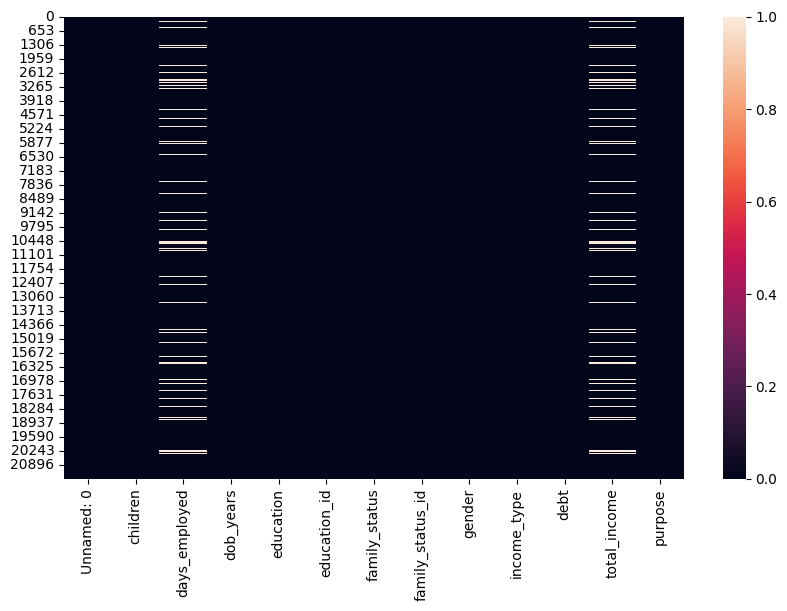

In [ ]:
#провизуализируем пропущенные значения, и посмотрим, совпадают ли эти пропуски, а также их количество на фоне всех данных
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna())
plt.show()

In [ ]:
#посмотрим процент пропущенных значений
(df.isna().sum()[df.isna().sum() > 0] / len(df) * 100).round(2)

,0
days_employed,10.1
total_income,10.1


In [ ]:
#посмотрим данные, где переменная days_employed пропущена
df[df['days_employed'].isna()].head()

,Unnamed: 0,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу


видим, что пропуски совпадают

In [ ]:
#проверяем пропуск
df_missing = df[(df['days_employed'].isna()) & (df['total_income'].isna())]
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2174 entries, 12 to 21510
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2174 non-null   int64  
 1   children          2174 non-null   int64  
 2   days_employed     0 non-null      float64
 3   dob_years         2174 non-null   int64  
 4   education         2174 non-null   object 
 5   education_id      2174 non-null   int64  
 6   family_status     2174 non-null   object 
 7   family_status_id  2174 non-null   int64  
 8   gender            2174 non-null   object 
 9   income_type       2174 non-null   object 
 10  debt              2174 non-null   int64  
 11  total_income      0 non-null      float64
 12  purpose           2174 non-null   object 
dtypes: float64(2), int64(6), object(5)
memory usage: 237.8+ KB


Анализ показал, что пропуски в колонках `days_employed` и `total_income` полностью совпадают. Всего таких наблюдений 2174, что составляет 10,1% от общего числа записей. Это указывает на систематическую природу пропусков, а не случайные ошибки в данных.

**Возможные причины:**  

1. **Данные о доходе и стаже отсутствуют для определённых групп**

2. **Ошибка при сборе информации** — возможно, система автоматически пропускает одно из значений, если другое не заполнено.  

3. **Технические ограничения или бизнес-правила** — если данные поступают из нескольких источников, один из них мог быть недоступен, либо существуют ограничения, из-за которых оба поля остаются пустыми одновременно.

Необходимо проверить категории клиентов с пропусками.

In [ ]:
#смотрим уникальное количество в столбце образование
df_missing['education'].nunique()

12

In [ ]:
#смотрим список уникальных наименований
df_missing['education'].unique()

array(['среднее', 'высшее', 'СРЕДНЕЕ', 'неоконченное высшее', 'Среднее',
       'Неоконченное высшее', 'Высшее', 'НЕОКОНЧЕННОЕ ВЫСШЕЕ',
       'начальное', 'ВЫСШЕЕ', 'Начальное', 'НАЧАЛЬНОЕ'], dtype=object)

In [ ]:
#то же самое для типа занятости
df_missing['income_type'].nunique()

5

In [ ]:
df_missing['income_type'].unique()

array(['пенсионер', 'госслужащий', 'компаньон', 'сотрудник',
       'предприниматель'], dtype=object)

In [ ]:
#смотрим список уникальных целей кредита
df_missing['purpose'].unique()

array(['сыграть свадьбу', 'образование',
       'строительство жилой недвижимости',
       'сделка с подержанным автомобилем',
       'операции с коммерческой недвижимостью', 'покупка жилья для семьи',
       'жилье', 'операции с жильем', 'на проведение свадьбы',
       'покупка жилой недвижимости', 'профильное образование',
       'высшее образование', 'автомобиль', 'свадьба',
       'строительство недвижимости', 'свой автомобиль',
       'на покупку подержанного автомобиля',
       'строительство собственной недвижимости', 'покупка своего жилья',
       'заняться высшим образованием', 'недвижимость',
       'операции со своей недвижимостью', 'покупка жилья для сдачи',
       'сделка с автомобилем', 'приобретение автомобиля',
       'получение высшего образования', 'дополнительное образование',
       'на покупку автомобиля', 'покупка недвижимости', 'автомобили',
       'покупка коммерческой недвижимости', 'покупка жилья',
       'получение образования', 'операции с недвижимостью',
  

**Судя по другим переменным, пропущенные данные не относятся к одной категории.**

Разберемся с названиями колонок, их содержимым, а также выбросами, если они имеются

In [ ]:
#выведем список колонок в датафрейме
df.columns

Index(['Unnamed: 0', 'children', 'days_employed', 'dob_years', 'education',
       'education_id', 'family_status', 'family_status_id', 'gender',
       'income_type', 'debt', 'total_income', 'purpose'],
      dtype='object')

In [ ]:
#посмотрим сколько мб занимает датафрейм а потом и каждая его колонка
df.memory_usage(deep=True).sum() / (1024**2)

np.float64(13.651934623718262)

In [ ]:
#выведем сразу информацию о памяти и типе данных, сохраним в функцию для дальнейшего использования
def df_info(df):
    df_info = pd.DataFrame({
              'Column': df.columns,
              'Dtype': df.dtypes.values,
              'Memory (MB)': df.memory_usage(deep=True)[1:] / (1024**2)  #пропускаем первую строку (индекс)
     })
    return df_info

In [ ]:
df_info(df)

,Column,Dtype,Memory (MB)
Unnamed: 0,Unnamed: 0,int64,0.164223
children,children,int64,0.164223
days_employed,days_employed,float64,0.164223
dob_years,dob_years,int64,0.164223
education,education,object,2.294179
education_id,education_id,int64,0.164223
family_status,family_status,object,2.928083
family_status_id,family_status_id,int64,0.164223
gender,gender,object,1.190617
income_type,income_type,object,2.453997


1. Колонка `Unnamed: 0` пустая и повторяет нумерацию строк датафрейма.
2. Название ` dob_years`может вводить в замешательство, лучше пермееиновать на `age`
3. `int64` и `float64` весят одинаково, на данном этапе работы нет необходимости преобразования.
4. Объектные (`object`) колонки занимают больше места, из-за того, что текстовые данные хранятся как строки. **По смыслу** данные колонки содержат повторяющиеся значения, неообходимо поработать с содержанием данных колонок для их дальнейшего преобразования в `category`.





In [ ]:
#удаляем ненужную колонку
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
#меняем название колонки
df.rename(columns={'dob_years': 'age'}, inplace=True)

In [ ]:
df.info()
df_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   age               21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


,Column,Dtype,Memory (MB)
children,children,int64,0.164223
days_employed,days_employed,float64,0.164223
age,age,int64,0.164223
education,education,object,2.294179
education_id,education_id,int64,0.164223
family_status,family_status,object,2.928083
family_status_id,family_status_id,int64,0.164223
gender,gender,object,1.190617
income_type,income_type,object,2.453997
debt,debt,int64,0.164223


## Предобработка категориальных переменных

In [ ]:
#переходим к работе с объектами, выведем все колонки типа объект
df.select_dtypes(include=['object'])

,education,family_status,gender,income_type,purpose
0,высшее,женат / замужем,F,сотрудник,покупка жилья
1,среднее,женат / замужем,F,сотрудник,приобретение автомобиля
2,Среднее,женат / замужем,M,сотрудник,покупка жилья
3,среднее,женат / замужем,M,сотрудник,дополнительное образование
4,среднее,гражданский брак,F,пенсионер,сыграть свадьбу
...,...,...,...,...,...
21520,среднее,гражданский брак,F,компаньон,операции с жильем
21521,среднее,женат / замужем,F,пенсионер,сделка с автомобилем
21522,среднее,гражданский брак,M,сотрудник,недвижимость
21523,среднее,женат / замужем,M,сотрудник,на покупку своего автомобиля


**Как уже отмечалось ранее, эти колонки по своему смыслу являются категориальными, но из-за несогласованности записей (разный регистр, синонимы и т. д.) их значения выглядят как уникальные.**

In [ ]:
#посмотрим количество уникальных категорий и их значения
def unique_categories_info(df, columns):
    for column in columns:
        print(f'Колонка "{column}" имеет {df[column].nunique()} уникальных значений:')
        print(df[column].unique())
        print()


#columns_to_check = ['education', 'family_status', 'gender', 'income_type', 'purpose']
columns_to_check = df.select_dtypes(include=['object']).columns
unique_categories_info(df, columns_to_check)

Колонка "education" имеет 15 уникальных значений:
['высшее' 'среднее' 'Среднее' 'СРЕДНЕЕ' 'ВЫСШЕЕ' 'неоконченное высшее'
 'начальное' 'Высшее' 'НЕОКОНЧЕННОЕ ВЫСШЕЕ' 'Неоконченное высшее'
 'НАЧАЛЬНОЕ' 'Начальное' 'Ученая степень' 'УЧЕНАЯ СТЕПЕНЬ'
 'ученая степень']

Колонка "family_status" имеет 5 уникальных значений:
['женат / замужем' 'гражданский брак' 'вдовец / вдова' 'в разводе'
 'Не женат / не замужем']

Колонка "gender" имеет 3 уникальных значений:
['F' 'M' 'XNA']

Колонка "income_type" имеет 8 уникальных значений:
['сотрудник' 'пенсионер' 'компаньон' 'госслужащий' 'безработный'
 'предприниматель' 'студент' 'в декрете']

Колонка "purpose" имеет 38 уникальных значений:
['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'сыграть свадьбу' 'операции с жильем' 'образование'
 'на проведение свадьбы' 'покупка жилья для семьи' 'покупка недвижимости'
 'покупка коммерческой недвижимости' 'покупка жилой недвижимости'
 'строительство собственной недвижимости' 'недвижимо

In [ ]:
#перепишем все в нижний регистр
df[df.select_dtypes(include=['object']).columns] = df.select_dtypes(include=['object']).apply(lambda x: x.str.lower())

In [ ]:
#снова посмотрим наши объекты
unique_categories_info(df, columns_to_check)

Колонка "education" имеет 5 уникальных значений:
['высшее' 'среднее' 'неоконченное высшее' 'начальное' 'ученая степень']

Колонка "family_status" имеет 5 уникальных значений:
['женат / замужем' 'гражданский брак' 'вдовец / вдова' 'в разводе'
 'не женат / не замужем']

Колонка "gender" имеет 3 уникальных значений:
['f' 'm' 'xna']

Колонка "income_type" имеет 8 уникальных значений:
['сотрудник' 'пенсионер' 'компаньон' 'госслужащий' 'безработный'
 'предприниматель' 'студент' 'в декрете']

Колонка "purpose" имеет 38 уникальных значений:
['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'сыграть свадьбу' 'операции с жильем' 'образование'
 'на проведение свадьбы' 'покупка жилья для семьи' 'покупка недвижимости'
 'покупка коммерческой недвижимости' 'покупка жилой недвижимости'
 'строительство собственной недвижимости' 'недвижимость'
 'строительство недвижимости' 'на покупку подержанного автомобиля'
 'на покупку своего автомобиля' 'операции с коммерческой недвижимостью'


In [ ]:
df.columns

Index(['children', 'days_employed', 'age', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

In [ ]:
unique_categories_info(df, ['education'])
df['education_id'].nunique()

Колонка "education" имеет 5 уникальных значений:
['высшее' 'среднее' 'неоконченное высшее' 'начальное' 'ученая степень']



5

Как мы видим, колонка `education` содержит 5 уникальных значений, в то время как колонка `education_id` хранит числовые коды для этих категорий. Для удобства интерпретации обе колонки будут сохранены, но для анализа и сверки данных будет использоваться колонка с числовыми значениями (`education_id`).

In [ ]:
unique_categories_info(df, ['family_status'])
df['family_status'].nunique()

Колонка "family_status" имеет 5 уникальных значений:
['женат / замужем' 'гражданский брак' 'вдовец / вдова' 'в разводе'
 'не женат / не замужем']



5

In [ ]:
#переведем две колонки в категориальные
df['education'] = df['education'].astype('category')

In [ ]:
df['family_status'] = df['family_status'].astype('category')

In [ ]:
df['income_type'] = df['income_type'].astype('category')

In [ ]:
df.info()
df_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   children          21525 non-null  int64   
 1   days_employed     19351 non-null  float64 
 2   age               21525 non-null  int64   
 3   education         21525 non-null  category
 4   education_id      21525 non-null  int64   
 5   family_status     21525 non-null  category
 6   family_status_id  21525 non-null  int64   
 7   gender            21525 non-null  object  
 8   income_type       21525 non-null  category
 9   debt              21525 non-null  int64   
 10  total_income      19351 non-null  float64 
 11  purpose           21525 non-null  object  
dtypes: category(3), float64(2), int64(5), object(2)
memory usage: 1.5+ MB


,Column,Dtype,Memory (MB)
children,children,int64,0.164223
days_employed,days_employed,float64,0.164223
age,age,int64,0.164223
education,education,category,0.021296
education_id,education_id,int64,0.164223
family_status,family_status,category,0.021361
family_status_id,family_status_id,int64,0.164223
gender,gender,object,1.190617
income_type,income_type,category,0.021751
debt,debt,int64,0.164223


In [ ]:
print(f'экономия памяти с одной колонки:{2.294179-0.021296}')

экономия памяти с одной колонки:2.272883


Хотя экономия памяти может не играть ключевую роль в данной задаче из-за ограниченного объёма данных, в более ресурсоёмких проектах она напрямую влияет не только на использование оперативной памяти, но и на скорость выполнения моделей, особенно при работе с большими датасетами или сложными алгоритмами

In [ ]:
unique_categories_info(df, df.select_dtypes(include=['object']).columns)

Колонка "gender" имеет 3 уникальных значений:
['f' 'm' 'xna']

Колонка "purpose" имеет 38 уникальных значений:
['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'сыграть свадьбу' 'операции с жильем' 'образование'
 'на проведение свадьбы' 'покупка жилья для семьи' 'покупка недвижимости'
 'покупка коммерческой недвижимости' 'покупка жилой недвижимости'
 'строительство собственной недвижимости' 'недвижимость'
 'строительство недвижимости' 'на покупку подержанного автомобиля'
 'на покупку своего автомобиля' 'операции с коммерческой недвижимостью'
 'строительство жилой недвижимости' 'жилье'
 'операции со своей недвижимостью' 'автомобили' 'заняться образованием'
 'сделка с подержанным автомобилем' 'получение образования' 'автомобиль'
 'свадьба' 'получение дополнительного образования' 'покупка своего жилья'
 'операции с недвижимостью' 'получение высшего образования'
 'свой автомобиль' 'сделка с автомобилем' 'профильное образование'
 'высшее образование' 'покупка жилья д

Остается только колонка с полом заемщика, которую логичнее было бы представить в виде булевой переменной, и колонка с целью кредита.

In [ ]:
#посмотрим, дф, где "gender" == 'xna'
df[df['gender'] == 'xna']['gender'].value_counts()

,count
gender,
xna,1


In [ ]:
df[df['gender'] == 'xna']

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,-2358.600502,24,неоконченное высшее,2,гражданский брак,1,xna,компаньон,0,203905.157261,покупка недвижимости


Как видно, значение в колонке "пол" отсутствует, а также в колонке "days_employed" присутствует аномальное значение -2358.600502, что похоже на выброс. Даже если минус был поставлен случайно, то это примерно 6 с половиной лет работы. Учитывая, что возраст заемщика составляет 24 года, и у него неоконченное высшее образование (бакалавриат), маловероятно, что он начал работать с 17 лет.

### кодирование перменной

In [ ]:
df = df[df['gender'] != 'xna']

In [ ]:
#закодируем пол
dict = {'f': 1, 'm': 0}
df['gender'] = df['gender'].map(dict)
#df['gender'] = df['gender'].astype('bool')

<ipython-input-38-2b10837f5be6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = df['gender'].map(dict)


1 = женский
0 = мужчина

In [ ]:
df.info()
df_info(df)

<class 'pandas.core.frame.DataFrame'>
Index: 21524 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   children          21524 non-null  int64   
 1   days_employed     19350 non-null  float64 
 2   age               21524 non-null  int64   
 3   education         21524 non-null  category
 4   education_id      21524 non-null  int64   
 5   family_status     21524 non-null  category
 6   family_status_id  21524 non-null  int64   
 7   gender            21524 non-null  int64   
 8   income_type       21524 non-null  category
 9   debt              21524 non-null  int64   
 10  total_income      19350 non-null  float64 
 11  purpose           21524 non-null  object  
dtypes: category(3), float64(2), int64(6), object(1)
memory usage: 1.7+ MB


,Column,Dtype,Memory (MB)
children,children,int64,0.164215
days_employed,days_employed,float64,0.164215
age,age,int64,0.164215
education,education,category,0.021295
education_id,education_id,int64,0.164215
family_status,family_status,category,0.021360
family_status_id,family_status_id,int64,0.164215
gender,gender,int64,0.164215
income_type,income_type,category,0.021750
debt,debt,int64,0.164215


In [ ]:
df.head()

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,1,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,1,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,среднее,1,женат / замужем,0,0,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,0,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,1,пенсионер,0,158616.077870,сыграть свадьбу


### работа с текстом

In [ ]:
unique_categories_info(df, df.select_dtypes(include=['object']).columns)

Колонка "purpose" имеет 38 уникальных значений:
['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'сыграть свадьбу' 'операции с жильем' 'образование'
 'на проведение свадьбы' 'покупка жилья для семьи' 'покупка недвижимости'
 'покупка коммерческой недвижимости' 'покупка жилой недвижимости'
 'строительство собственной недвижимости' 'недвижимость'
 'строительство недвижимости' 'на покупку подержанного автомобиля'
 'на покупку своего автомобиля' 'операции с коммерческой недвижимостью'
 'строительство жилой недвижимости' 'жилье'
 'операции со своей недвижимостью' 'автомобили' 'заняться образованием'
 'сделка с подержанным автомобилем' 'получение образования' 'автомобиль'
 'свадьба' 'получение дополнительного образования' 'покупка своего жилья'
 'операции с недвижимостью' 'получение высшего образования'
 'свой автомобиль' 'сделка с автомобилем' 'профильное образование'
 'высшее образование' 'покупка жилья для сдачи' 'на покупку автомобиля'
 'ремонт жилью' 'заняться выс

In [ ]:
print(df['purpose'].value_counts())

purpose
свадьба                                   797
на проведение свадьбы                     777
сыграть свадьбу                           774
операции с недвижимостью                  676
покупка коммерческой недвижимости         664
операции с жильем                         653
покупка жилья для сдачи                   653
операции с коммерческой недвижимостью     651
жилье                                     647
покупка жилья                             647
покупка жилья для семьи                   641
строительство собственной недвижимости    635
недвижимость                              634
операции со своей недвижимостью           630
строительство жилой недвижимости          626
покупка недвижимости                      623
строительство недвижимости                620
покупка своего жилья                      620
ремонт жилью                              612
покупка жилой недвижимости                607
на покупку своего автомобиля              505
заняться высшим образовани

In [ ]:
#загружаем библиотеку для работы с текстом
pip install pymorphy3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 88.1 MB/s eta 0:00:00


In [ ]:
import pymorphy3
morph = pymorphy3.MorphAnalyzer()

In [ ]:
#функция для лемматизации текста
def lemmatize_text(text):
    """
    Приводит текст к начальной форме, разбивая его на слова.
    """
    words = text.split()
    lemmas = [morph.parse(word)[0].normal_form for word in words]
    return " ".join(lemmas)

In [ ]:
#применяем функцию
df['purpose_lemmatized'] = df['purpose'].apply(lemmatize_text)

### кластеризация методом KMeans

In [ ]:
#загружаем библиотеки для кластеризации текста.
#после приведения слов к начальной форме,
#проанализируем с помощью Kmeans количество уникальных по смыслу целей кредита
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

#векторизация текста
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['purpose_lemmatized'])

#кластеризация текста
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['purpose_cluster'] = kmeans.fit_predict(X)

#кластеры
for i in range(5):
    print(f'Кластер {i}:')
    print(df[df['purpose_cluster'] == i]['purpose_lemmatized'].unique())
    print()


Кластер 0:
['покупка недвижимость' 'покупка коммерческий недвижимость'
 'покупка жилой недвижимость' 'строительство собственный недвижимость'
 'недвижимость' 'строительство недвижимость'
 'операция с коммерческий недвижимость' 'строительство жилой недвижимость'
 'операция с свой недвижимость' 'операция с недвижимость']

Кластер 1:
['приобретение автомобиль' 'на покупка подержать автомобиль'
 'на покупка свой автомобиль' 'автомобиль' 'сделка с подержать автомобиль'
 'свой автомобиль' 'сделка с автомобиль' 'на покупка автомобиль']

Кластер 2:
['покупка жильё' 'операция с жильё' 'покупка жильё для семья' 'жильё'
 'покупка свой жильё' 'покупка жильё для сдача' 'ремонт жильё']

Кластер 3:
['дополнительный образование' 'образование' 'заняться образование'
 'получение образование' 'получение дополнительный образование'
 'получение высокий образование' 'профильный образование'
 'высокий образование' 'заняться высокий образование']

Кластер 4:
['сыграть свадьба' 'на проведение свадьба' 'свадьба

In [ ]:
#пишем функцию для разметки данных в соответствии с кластерами по целям кредита
def purpose_categorization(purpose_cluster):
  if purpose_cluster in [0, 2]:
    return 'недвижимость'
  elif purpose_cluster == 1:
    return 'автомобиль'
  elif purpose_cluster == 3:
    return 'образование'
  elif purpose_cluster == 4:
    return 'свадьба'

In [ ]:
#создаем соответствующую переменную
df['purpose_category'] = df['purpose_cluster'].apply(purpose_categorization)

In [ ]:
df.head()

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_lemmatized,purpose_cluster,purpose_category
0,1,-8437.673028,42,высшее,0,женат / замужем,0,1,сотрудник,0,253875.639453,покупка жилья,покупка жильё,2,недвижимость
1,1,-4024.803754,36,среднее,1,женат / замужем,0,1,сотрудник,0,112080.014102,приобретение автомобиля,приобретение автомобиль,1,автомобиль
2,0,-5623.422610,33,среднее,1,женат / замужем,0,0,сотрудник,0,145885.952297,покупка жилья,покупка жильё,2,недвижимость
3,3,-4124.747207,32,среднее,1,женат / замужем,0,0,сотрудник,0,267628.550329,дополнительное образование,дополнительный образование,3,образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,1,пенсионер,0,158616.077870,сыграть свадьбу,сыграть свадьба,4,свадьба


In [ ]:
#проверяем всем ли данным была присвоена переменная
df['purpose_category'].isna().sum()

np.int64(0)

In [ ]:
df['purpose_category'].nunique()

4

In [ ]:
#теперь цели кредита выглядят так
df['purpose_category'].unique()

array(['недвижимость', 'автомобиль', 'образование', 'свадьба'],
      dtype=object)

In [ ]:
#переводим в категориальный тип данных
df['purpose_category'] = df['purpose_category'].astype('category')

In [ ]:
#создадим сразу столбец "purpose_id" по анологии с "education_id" и "family_status_id"
df['purpose_id'] = pd.Categorical(df['purpose_category']).codes.astype('int64')

In [ ]:
#удалим ненужные столбцы
df.drop(columns=['purpose', 'purpose_cluster', 'purpose_lemmatized'], inplace=True)

In [ ]:
df.info()
print(df_info(df))

<class 'pandas.core.frame.DataFrame'>
Index: 21524 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   children          21524 non-null  int64   
 1   days_employed     19350 non-null  float64 
 2   age               21524 non-null  int64   
 3   education         21524 non-null  category
 4   education_id      21524 non-null  int64   
 5   family_status     21524 non-null  category
 6   family_status_id  21524 non-null  int64   
 7   gender            21524 non-null  int64   
 8   income_type       21524 non-null  category
 9   debt              21524 non-null  int64   
 10  total_income      19350 non-null  float64 
 11  purpose_category  21524 non-null  category
 12  purpose_id        21524 non-null  int64   
dtypes: category(4), float64(2), int64(7)
memory usage: 1.7 MB
                            Column     Dtype  Memory (MB)
children                  children     int64     0.1642

Все сработало! Теперь у нас есть колонка, где цель кредита представлена в виде категорий, и всего выделено 4 основные группы.

## предобработка числовых переменных


Переходим к числовым переменным

In [ ]:
#создадим удобную переменную для хранения всех числовых столбцов, за исключением закодированных категориальных
numcol = df.loc[:, ~df.columns.isin(['education_id', 'family_status_id', 'purpose_id', 'gender', 'debt'])].select_dtypes(include=['int64', 'float64']).columns

In [ ]:
print(numcol)

Index(['children', 'days_employed', 'age', 'total_income'], dtype='object')


In [ ]:
#смотрим статистику по числовым переменным
df[df.loc[:, ~df.columns.isin(['education_id', 'family_status_id', 'purpose_id', 'gender', 'debt'])].select_dtypes(include=['int64', 'float64']).columns].describe()

,children,days_employed,age,total_income
count,21524.000000,19350.000000,21524.000000,1.935000e+04
mean,0.538933,63049.877770,43.294276,1.674204e+05
std,1.381615,140830.166081,12.574188,1.029739e+05
min,-1.000000,-18388.949901,0.000000,2.066726e+04
25%,0.000000,-2747.486276,33.000000,1.030407e+05
50%,0.000000,-1203.307346,42.000000,1.450117e+05
75%,1.000000,-291.077541,53.000000,2.034244e+05
max,20.000000,401755.400475,75.000000,2.265604e+06


### количество детей

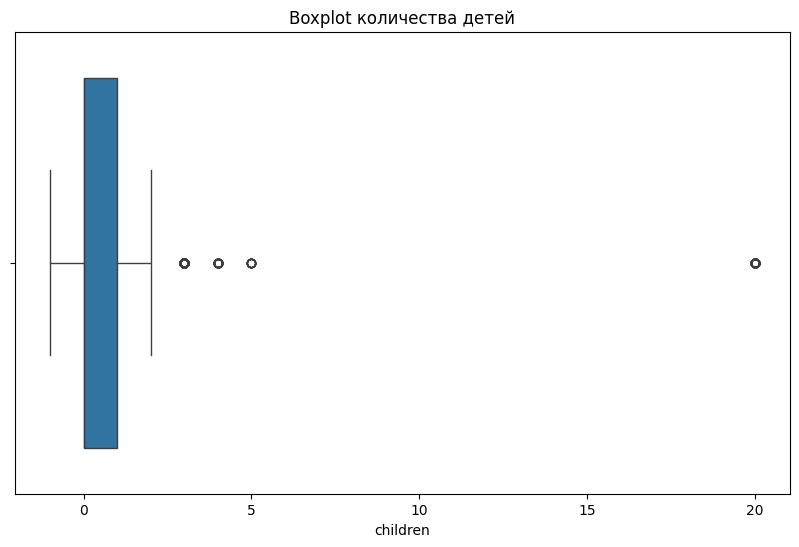

In [ ]:
#визуализация боксплота по переменной количества детей
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['children'])
plt.title('Boxplot количества детей')
plt.show()

In [ ]:
#посмотрим выброс 'поближе'
df[df['children'] == 20].head(20)

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose_category,purpose_id
606,20,-880.221113,21,среднее,1,женат / замужем,0,0,компаньон,0,145334.865002,недвижимость,1
720,20,-855.595512,44,среднее,1,женат / замужем,0,1,компаньон,0,112998.738649,недвижимость,1
1074,20,-3310.411598,56,среднее,1,женат / замужем,0,1,сотрудник,1,229518.537004,образование,2
2510,20,-2714.161249,59,высшее,0,вдовец / вдова,2,1,сотрудник,0,264474.835577,недвижимость,1
2941,20,-2161.591519,0,среднее,1,женат / замужем,0,1,сотрудник,0,199739.941398,автомобиль,0
3302,20,NaN,35,среднее,1,не женат / не замужем,4,1,госслужащий,0,NaN,образование,2
3396,20,NaN,56,высшее,0,женат / замужем,0,1,компаньон,0,NaN,образование,2
3671,20,-913.161503,23,среднее,1,не женат / не замужем,4,1,сотрудник,0,101255.492076,автомобиль,0
3697,20,-2907.910616,40,среднее,1,гражданский брак,1,0,сотрудник,0,115380.694664,автомобиль,0
3735,20,-805.044438,26,высшее,0,не женат / не замужем,4,0,сотрудник,0,137200.646181,недвижимость,1


In [ ]:
df[df['children'] == 20].info()

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, 606 to 21491
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   children          76 non-null     int64   
 1   days_employed     67 non-null     float64 
 2   age               76 non-null     int64   
 3   education         76 non-null     category
 4   education_id      76 non-null     int64   
 5   family_status     76 non-null     category
 6   family_status_id  76 non-null     int64   
 7   gender            76 non-null     int64   
 8   income_type       76 non-null     category
 9   debt              76 non-null     int64   
 10  total_income      67 non-null     float64 
 11  purpose_category  76 non-null     category
 12  purpose_id        76 non-null     int64   
dtypes: category(4), float64(2), int64(7)
memory usage: 7.2 KB


In [ ]:
df[df['children'] == 20][numcol].describe()

,children,days_employed,age,total_income
count,76.0,67.000000,76.000000,67.000000
mean,20.0,35779.535997,41.815789,168720.526180
std,0.0,112008.279425,12.065058,80851.738318
min,20.0,-11937.171389,0.000000,53971.576721
25%,20.0,-2629.663890,33.750000,114668.631192
50%,20.0,-957.251278,41.500000,144544.530170
75%,20.0,-478.364082,50.000000,218033.697152
max,20.0,385267.263676,69.000000,441721.334145


Наличие 76 клиентов с 20 детьми — очевидный выброс. По данным Всероссийской переписи, в стране всего 929 семей с 11 и более детьми, а 20 детей — крайне редкое явление. В данных даже нет клиентов с 6–19 детьми, что делает такие значения ещё более маловероятными. Вероятнее всего, это ошибка при сборе данных. Определить, что именно имелось в виду (2 ребёнка, 0 или другое число), невозможно, поэтому такие записи следует удалить.

Также в данных есть строки, где число детей равно -1, что является ошибкой при заполнении.

In [ ]:
#посмотрим эти строки
df[df['children'] == -1]

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose_category,purpose_id
291,-1,-4417.703588,46,среднее,1,гражданский брак,1,1,сотрудник,0,102816.346412,образование,2
705,-1,-902.084528,50,среднее,1,женат / замужем,0,1,госслужащий,0,137882.899271,автомобиль,0
742,-1,-3174.456205,57,среднее,1,женат / замужем,0,1,сотрудник,0,64268.044444,образование,2
800,-1,349987.852217,54,среднее,1,не женат / не замужем,4,1,пенсионер,0,86293.724153,образование,2
941,-1,NaN,57,среднее,1,женат / замужем,0,1,пенсионер,0,NaN,автомобиль,0
1363,-1,-1195.264956,55,среднее,1,женат / замужем,0,1,компаньон,0,69550.699692,образование,2
1929,-1,-1461.303336,38,среднее,1,не женат / не замужем,4,0,сотрудник,0,109121.569013,недвижимость,1
2073,-1,-2539.761232,42,среднее,1,в разводе,3,1,компаньон,0,162638.609373,недвижимость,1
3814,-1,-3045.290443,26,среднее,1,гражданский брак,1,1,госслужащий,0,131892.785435,свадьба,3
4201,-1,-901.101738,41,среднее,1,женат / замужем,0,1,госслужащий,0,226375.766751,недвижимость,1


In [ ]:
#посмотрим описательную статистику по этим данным
df[df['children'] == -1][numcol].describe()

,children,days_employed,age,total_income
count,47.0,44.000000,47.000000,44.000000
mean,-1.0,55013.536077,42.574468,153863.178346
std,0.0,133777.712688,11.357328,69512.650813
min,-1.0,-9851.184337,23.000000,36052.447435
25%,-1.0,-3062.467445,33.500000,111736.056661
50%,-1.0,-1391.963378,41.000000,144293.168218
75%,-1.0,-436.405007,50.500000,170762.756784
max,-1.0,398001.302888,69.000000,321603.700207


In [ ]:
df[(df['children'] == -1) | (df['children'] == 20)].info()

<class 'pandas.core.frame.DataFrame'>
Index: 123 entries, 291 to 21491
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   children          123 non-null    int64   
 1   days_employed     111 non-null    float64 
 2   age               123 non-null    int64   
 3   education         123 non-null    category
 4   education_id      123 non-null    int64   
 5   family_status     123 non-null    category
 6   family_status_id  123 non-null    int64   
 7   gender            123 non-null    int64   
 8   income_type       123 non-null    category
 9   debt              123 non-null    int64   
 10  total_income      111 non-null    float64 
 11  purpose_category  123 non-null    category
 12  purpose_id        123 non-null    int64   
dtypes: category(4), float64(2), int64(7)
memory usage: 11.1 KB


In [ ]:
(123/21524)*100

0.5714551198661958

Процент данных с некорректным отображением количества детей составляет 0,57%, значит, их можно удалить без потерь

In [ ]:
#удалим строки с некорректным отображением количества детей
df = df.loc[~((df['children'] == -1) | (df['children'] == 20))]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21401 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   children          21401 non-null  int64   
 1   days_employed     19239 non-null  float64 
 2   age               21401 non-null  int64   
 3   education         21401 non-null  category
 4   education_id      21401 non-null  int64   
 5   family_status     21401 non-null  category
 6   family_status_id  21401 non-null  int64   
 7   gender            21401 non-null  int64   
 8   income_type       21401 non-null  category
 9   debt              21401 non-null  int64   
 10  total_income      19239 non-null  float64 
 11  purpose_category  21401 non-null  category
 12  purpose_id        21401 non-null  int64   
dtypes: category(4), float64(2), int64(7)
memory usage: 1.7 MB


In [ ]:
#смотрим обновленную описательную статистику по датасету
df[numcol].describe()

,children,days_employed,age,total_income
count,21401.000000,19239.000000,21401.000000,1.923900e+04
mean,0.473202,63163.226277,43.301107,1.674469e+05
std,0.751848,140931.814378,12.578657,1.031075e+05
min,0.000000,-18388.949901,0.000000,2.066726e+04
25%,0.000000,-2747.256509,33.000000,1.030000e+05
50%,0.000000,-1203.830172,42.000000,1.450179e+05
75%,1.000000,-289.734347,53.000000,2.034351e+05
max,5.000000,401755.400475,75.000000,2.265604e+06


### общий трудовой стаж в днях

Отлично, разберемся с `days_employed`.

<ipython-input-73-8c0a9627af27>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['days_employed'])


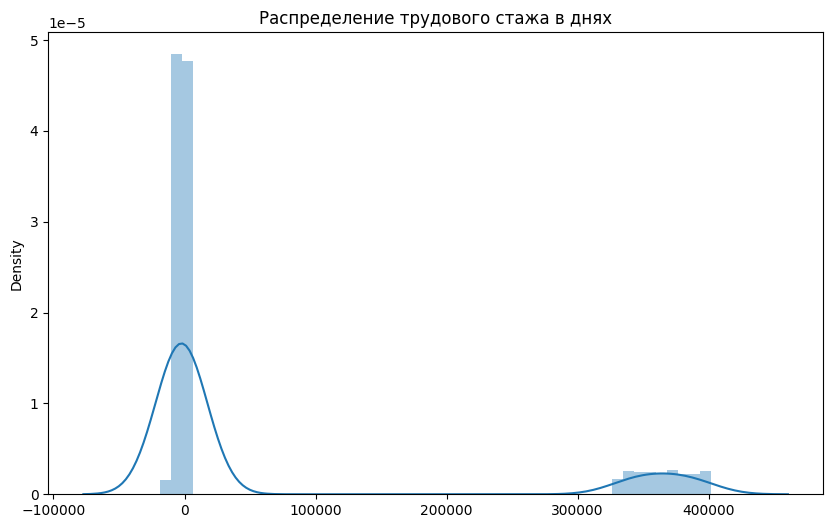

In [ ]:
#график распределение трудового стажа в днях
plt.figure(figsize=(10, 6))
sns.distplot(x=df['days_employed'])
plt.title('Распределение трудового стажа в днях')
plt.show()

Отрицательные дни это ошибка. Также как и сотни тысяч дней (=более 200 лет)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21401 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   children          21401 non-null  int64   
 1   days_employed     19239 non-null  float64 
 2   age               21401 non-null  int64   
 3   education         21401 non-null  category
 4   education_id      21401 non-null  int64   
 5   family_status     21401 non-null  category
 6   family_status_id  21401 non-null  int64   
 7   gender            21401 non-null  int64   
 8   income_type       21401 non-null  category
 9   debt              21401 non-null  int64   
 10  total_income      19239 non-null  float64 
 11  purpose_category  21401 non-null  category
 12  purpose_id        21401 non-null  int64   
dtypes: category(4), float64(2), int64(7)
memory usage: 1.7 MB


In [ ]:
#пооверяем, по каким категорям данных некорректное отображение трудового стажа в днях
print(df.groupby('education')['days_employed'].median())
print(df.groupby('education')['days_employed'].mean())

education
высшее                -1342.373432
начальное              -551.062561
неоконченное высшее   -1046.437583
среднее               -1184.718535
ученая степень        -1380.316041
Name: days_employed, dtype: float64
education
высшее                  38420.608207
начальное              127842.088750
неоконченное высшее     17815.851091
среднее                 72675.717212
ученая степень         116630.048157
Name: days_employed, dtype: float64


<ipython-input-75-855e0316ed02>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('education')['days_employed'].median())
<ipython-input-75-855e0316ed02>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('education')['days_employed'].mean())


Посмотрим данные клиентов, у которых стаж работы более 60 лет

In [ ]:
df[df['days_employed'] >= 21900].info()

<class 'pandas.core.frame.DataFrame'>
Index: 3431 entries, 4 to 21521
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   children          3431 non-null   int64   
 1   days_employed     3431 non-null   float64 
 2   age               3431 non-null   int64   
 3   education         3431 non-null   category
 4   education_id      3431 non-null   int64   
 5   family_status     3431 non-null   category
 6   family_status_id  3431 non-null   int64   
 7   gender            3431 non-null   int64   
 8   income_type       3431 non-null   category
 9   debt              3431 non-null   int64   
 10  total_income      3431 non-null   float64 
 11  purpose_category  3431 non-null   category
 12  purpose_id        3431 non-null   int64   
dtypes: category(4), float64(2), int64(7)
memory usage: 282.4 KB


In [ ]:
print(f'Процент данных с аномальным стажем от всего датасета: {len(df[df["days_employed"] >= 21900]) / len(df) * 100} ')

Процент данных с аномальным стажем от всего датасета: 16.031961123311994 


16% — это довольно много. Это значит, что почти каждый шестой человек в датасете имеет аномально высокий стаж, превышающий 60 лет (21900 дней). Это уже не случайные единичные ошибки, а целая систематическая проблема в данных.

In [ ]:
print(f'Процент данных с отрицательным значением: {len(df[df["days_employed"] < 0]) / len(df) * 100} ')

Процент данных с отрицательным значением: 73.86570720994347 


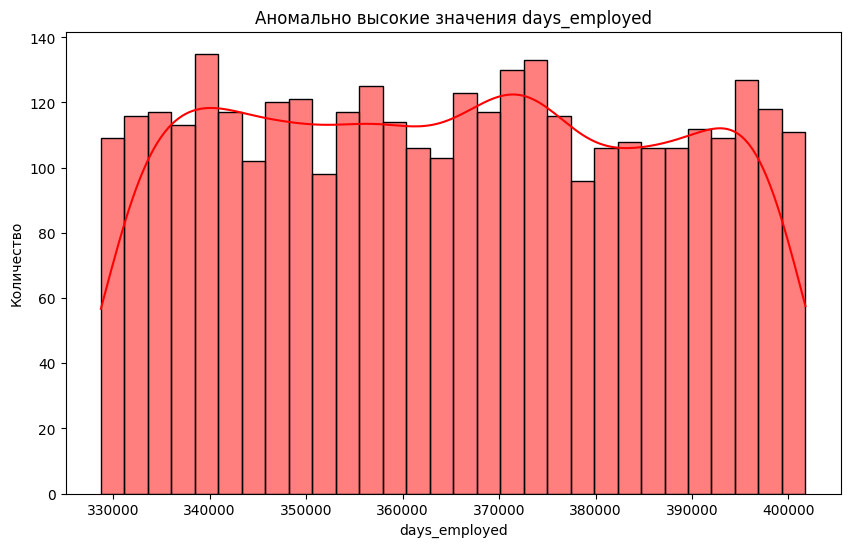

In [ ]:
#график аномально высоких значений days_employed
plt.figure(figsize=(10, 6))
sns.histplot(df[df['days_employed'] > 21900]['days_employed'], bins=30, kde=True, color='red')
plt.title('Аномально высокие значения days_employed')
plt.xlabel('days_employed')
plt.ylabel('Количество')
plt.show()


In [ ]:
df.groupby('gender')['days_employed'].median()

,days_employed
gender,
0,-1249.250759
1,-1179.579663


In [ ]:
df.groupby('income_type')['days_employed'].median()

<ipython-input-81-17bc0540c167>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('income_type')['days_employed'].median()


,days_employed
income_type,
безработный,366413.652744
в декрете,-3296.759962
госслужащий,-2689.137274
компаньон,-1555.901115
пенсионер,365286.622650
предприниматель,-520.848083
сотрудник,-1572.328285
студент,-578.751554


In [ ]:
df.groupby('education')['days_employed'].median()

<ipython-input-82-a26797650927>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('education')['days_employed'].median()


,days_employed
education,
высшее,-1342.373432
начальное,-551.062561
неоконченное высшее,-1046.437583
среднее,-1184.718535
ученая степень,-1380.316041


In [ ]:
df.groupby('purpose_category')['days_employed'].median()

<ipython-input-83-55de3ce893c7>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('purpose_category')['days_employed'].median()


,days_employed
purpose_category,
автомобиль,-1172.766652
недвижимость,-1214.858885
образование,-1217.934312
свадьба,-1205.929317


In [ ]:
df.groupby('family_status')['days_employed'].median()

<ipython-input-84-8dcf4bed2055>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('family_status')['days_employed'].median()


,days_employed
family_status,
в разводе,-1146.204668
вдовец / вдова,336995.172530
гражданский брак,-1196.479768
женат / замужем,-1332.260923
не женат / не замужем,-1016.642391


Для начала переведем все отрицательные значения дней стажа в положительные. Вероятно при заполнении данные вносились с "тире".

In [ ]:
df['days_employed'] = df['days_employed'].abs()

Теперь необходимо посмотреть данные, где тип дохода указан, как "безработный" и "пенсионер", а также те, где семейное положение отмечено, как "вдова / вдовец".

In [ ]:
#df[df['family_status_id']==2][['family_status', 'family_status_id']]

In [ ]:
df[df['family_status_id'] == 2].head(30)

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose_category,purpose_id
18,0,400281.136913,53,среднее,1,вдовец / вдова,2,1,пенсионер,0,56823.777243,автомобиль,0
56,0,370145.087237,64,среднее,1,вдовец / вдова,2,1,пенсионер,0,149141.043533,образование,2
57,0,2424.809749,44,среднее,1,вдовец / вдова,2,1,сотрудник,0,58616.405960,образование,2
100,0,605.026441,49,среднее,1,вдовец / вдова,2,1,сотрудник,1,176384.882536,недвижимость,1
105,0,2098.626296,62,среднее,1,вдовец / вдова,2,1,сотрудник,0,76884.187588,недвижимость,1
143,0,1893.299829,48,среднее,1,вдовец / вдова,2,1,сотрудник,0,151069.438470,недвижимость,1
154,1,1803.930605,41,высшее,0,вдовец / вдова,2,1,сотрудник,0,143113.329293,недвижимость,1
168,0,361970.220505,67,среднее,1,вдовец / вдова,2,1,пенсионер,0,139038.944645,недвижимость,1
174,0,NaN,55,высшее,0,вдовец / вдова,2,1,компаньон,0,NaN,автомобиль,0
178,0,395728.361398,59,среднее,1,вдовец / вдова,2,1,пенсионер,0,87268.778786,автомобиль,0


Похоже, что проблема в группе "пенсионеров" первостепенна. Просто, среди пенсионеров больше вдовцев, по сравнению с другими группами.

In [ ]:
df[df['income_type'] == 'пенсионер']['days_employed'].describe()

,days_employed
count,3429.000000
mean,365025.091981
std,21082.047113
min,328728.720605
25%,346659.278376
50%,365286.622650
75%,383285.519623
max,401755.400475


In [ ]:
df[(df['income_type'] == 'пенсионер') & (df['days_employed'].notna())].head(30)

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose_category,purpose_id
4,0,340266.072047,53,среднее,1,гражданский брак,1,1,пенсионер,0,158616.077870,свадьба,3
18,0,400281.136913,53,среднее,1,вдовец / вдова,2,1,пенсионер,0,56823.777243,автомобиль,0
24,1,338551.952911,57,среднее,1,не женат / не замужем,4,1,пенсионер,0,290547.235997,недвижимость,1
25,0,363548.489348,67,среднее,1,женат / замужем,0,0,пенсионер,0,55112.757732,недвижимость,1
30,1,335581.668515,62,среднее,1,женат / замужем,0,1,пенсионер,0,171456.067993,недвижимость,1
35,0,394021.072184,68,среднее,1,гражданский брак,1,0,пенсионер,0,77805.677436,свадьба,3
50,0,353731.432338,63,среднее,1,женат / замужем,0,1,пенсионер,0,92342.730612,автомобиль,0
56,0,370145.087237,64,среднее,1,вдовец / вдова,2,1,пенсионер,0,149141.043533,образование,2
71,0,338113.529892,62,среднее,1,женат / замужем,0,1,пенсионер,0,43929.696397,автомобиль,0
78,0,359722.945074,61,высшее,0,женат / замужем,0,0,пенсионер,0,175127.646000,автомобиль,0


In [ ]:
df[(df['income_type'] == 'безработный')]

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose_category,purpose_id
3133,1,337524.466835,31,среднее,1,женат / замужем,0,0,безработный,1,59956.991984,недвижимость,1
14798,0,395302.838654,45,высшее,0,гражданский брак,1,1,безработный,0,202722.511368,недвижимость,1


Если предположить, что значения в столбце days_employed были случайно умножены на 1000, то стаж пенсионеров окажется в пределах от 1 до 2 лет, что выглядит маловероятным. Также не выдерживают проверки и версии о том, что данные представлены в другой единице измерения — например, в часах или в днях, полученных из лет путём многократных пересчётов. В некоторых строках стаж даже превышает возраст заёмщика, что также невозможно.

Наиболее правдоподобной выглядит версия о том, что это — техническая «заглушка», используемая для замены недоступных или нерелевантных данных. Этот подход хорошо согласуется с тем фактом, что аналогичные аномальные значения встречаются и у безработных. Вероятно, таким способом система сигнализирует о том, что стаж в этих случаях не должен учитываться.

In [ ]:
df[df['days_employed'].isna()].head(15)

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose_category,purpose_id
12,0,NaN,65,среднее,1,гражданский брак,1,0,пенсионер,0,NaN,свадьба,3
26,0,NaN,41,среднее,1,женат / замужем,0,0,госслужащий,0,NaN,образование,2
29,0,NaN,63,среднее,1,не женат / не замужем,4,1,пенсионер,0,NaN,недвижимость,1
41,0,NaN,50,среднее,1,женат / замужем,0,1,госслужащий,0,NaN,автомобиль,0
55,0,NaN,54,среднее,1,гражданский брак,1,1,пенсионер,1,NaN,свадьба,3
65,0,NaN,21,среднее,1,не женат / не замужем,4,0,компаньон,0,NaN,недвижимость,1
67,0,NaN,52,высшее,0,женат / замужем,0,1,пенсионер,0,NaN,недвижимость,1
72,1,NaN,32,высшее,0,женат / замужем,0,0,госслужащий,0,NaN,недвижимость,1
82,2,NaN,50,высшее,0,женат / замужем,0,1,сотрудник,0,NaN,недвижимость,1
83,0,NaN,52,среднее,1,женат / замужем,0,0,сотрудник,0,NaN,недвижимость,1


In [ ]:
len(df[df['days_employed'].isna()])

2162

In [ ]:
df[df['days_employed'] == 0]

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose_category,purpose_id


In [ ]:
df.groupby('income_type')['days_employed'].median()

<ipython-input-94-17bc0540c167>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('income_type')['days_employed'].median()


,days_employed
income_type,
безработный,366413.652744
в декрете,3296.759962
госслужащий,2689.137274
компаньон,1555.901115
пенсионер,365286.622650
предприниматель,520.848083
сотрудник,1572.328285
студент,578.751554


In [ ]:
df.groupby('age')['days_employed'].median()

,days_employed
age,
0,1756.243149
19,724.492610
20,674.838979
21,608.003610
22,703.310078
23,690.204208
24,937.050163
25,919.199388
26,1083.658132


In [ ]:
#сделаем сводную таблицу для отображения медианных значений с учетом возраста и образования

pivot_table = df.pivot_table(
    index='age',
    columns='education',
    values='days_employed',
    aggfunc='median'
)


<ipython-input-96-761468841fb4>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(


In [ ]:
pivot_table

education,высшее,начальное,неоконченное высшее,среднее,ученая степень
age,,,,,
0,1847.220142,NaN,242.351133,1796.765028,NaN
19,NaN,NaN,796.983636,640.290559,NaN
20,592.068159,NaN,771.037952,685.687432,NaN
21,463.584600,313.762280,649.658557,676.372351,NaN
22,697.033790,1331.017371,687.384552,746.858904,NaN
23,648.708629,750.603407,594.724322,742.595507,NaN
24,804.003654,949.705772,1033.550474,923.730864,NaN
25,852.702874,922.313934,919.156900,933.268330,NaN
26,1064.650275,2969.721341,1046.437583,1083.658132,NaN


In [ ]:
df[numcol].info()

<class 'pandas.core.frame.DataFrame'>
Index: 21401 entries, 0 to 21524
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   children       21401 non-null  int64  
 1   days_employed  19239 non-null  float64
 2   age            21401 non-null  int64  
 3   total_income   19239 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 836.0 KB


In [ ]:
#создадим флаг, где пометим все данные, в которых дни стажа были пропущены / аномально большие
df['days_employed_flag'] = (df['days_employed'].isna()) | (df['days_employed'] >= 26000)

In [ ]:
df[(df['days_employed'] > 2089.18) & (df['days_employed'] < 2089.19)]

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose_category,purpose_id,days_employed_flag


In [ ]:
#заполним пропуски медианными значениями с учетом образования, возраста и типа занятости
df['days_employed'] = df['days_employed'].fillna(
    df.groupby(['education', 'age', 'income_type'])['days_employed'].transform('median')
)


<ipython-input-101-46d002fd9ba8>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['education', 'age', 'income_type'])['days_employed'].transform('median')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21401 entries, 0 to 21524
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   children            21401 non-null  int64   
 1   days_employed       21386 non-null  float64 
 2   age                 21401 non-null  int64   
 3   education           21401 non-null  category
 4   education_id        21401 non-null  int64   
 5   family_status       21401 non-null  category
 6   family_status_id    21401 non-null  int64   
 7   gender              21401 non-null  int64   
 8   income_type         21401 non-null  category
 9   debt                21401 non-null  int64   
 10  total_income        19239 non-null  float64 
 11  purpose_category    21401 non-null  category
 12  purpose_id          21401 non-null  int64   
 13  days_employed_flag  21401 non-null  bool    
dtypes: bool(1), category(4), float64(2), int64(7)
memory usage: 1.7 MB


In [ ]:
#дозаполняем общей медианой оставшиеся пропуски
df['days_employed'] = df['days_employed'].fillna(df.loc[df['days_employed'] < 30000, 'days_employed'].median())

In [ ]:
#то же самое для total_income
df['total_income'] = df['total_income'].fillna(
    df.groupby(['education', 'age', 'income_type', 'family_status_id'])['total_income'].transform('median')
)

<ipython-input-104-eb19f353ce2e>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['education', 'age', 'income_type', 'family_status_id'])['total_income'].transform('median')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21401 entries, 0 to 21524
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   children            21401 non-null  int64   
 1   days_employed       21401 non-null  float64 
 2   age                 21401 non-null  int64   
 3   education           21401 non-null  category
 4   education_id        21401 non-null  int64   
 5   family_status       21401 non-null  category
 6   family_status_id    21401 non-null  int64   
 7   gender              21401 non-null  int64   
 8   income_type         21401 non-null  category
 9   debt                21401 non-null  int64   
 10  total_income        21334 non-null  float64 
 11  purpose_category    21401 non-null  category
 12  purpose_id          21401 non-null  int64   
 13  days_employed_flag  21401 non-null  bool    
dtypes: bool(1), category(4), float64(2), int64(7)
memory usage: 1.7 MB


In [ ]:
df['total_income'] = df['total_income'].fillna(df['total_income'].median())

Значения `days_employed` искажают данные. Лучше удалить эти аномальные значения, оставив пропуски (NaN), а не заменять их нулями. Нули могут ввести в заблуждение, особенно если они не отражают реальное значение стажа, а пропуски позволят потом использовать адекватную стратегию заполнения. Если оставить такие аномальные данные без изменений, они будут искажать общую картину. Например, агрегированные статистики (среднее, медиану) и результаты моделей могут сильно сместиться из-за экстремальных значений, что приведёт к неверным выводам. Кроме того, многие алгоритмы чувствительны к выбросам и могут обучаться хуже или выдавать непредсказуемые результаты.

In [ ]:
df[numcol].describe()

,children,days_employed,age,total_income
count,21401.000000,21401.000000,21401.000000,2.140100e+04
mean,0.473202,67329.153948,43.301107,1.657071e+05
std,0.751848,139400.069837,12.578657,9.872824e+04
min,0.000000,24.141633,0.000000,2.066726e+04
25%,0.000000,1005.371225,33.000000,1.064629e+05
50%,0.000000,2089.188931,42.000000,1.441271e+05
75%,1.000000,5366.819177,53.000000,1.983389e+05
max,5.000000,401755.400475,75.000000,2.265604e+06


In [ ]:
df[((df['income_type'] == 'пенсионер') | (df['income_type'] == 'безработный'))]['days_employed'].describe()

,days_employed
count,3841.000000
mean,364610.876657
std,23177.729134
min,1664.504901
25%,348680.763569
50%,365028.214767
75%,380870.172814
max,401755.400475


In [ ]:
df_filtered = df[((df['income_type'] == 'пенсионер') | (df['income_type'] == 'безработный'))]

In [ ]:
df_filtered[df_filtered['days_employed'] < 21000]

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose_category,purpose_id,days_employed_flag
3612,0,1664.504901,40,высшее,0,женат / замужем,0,0,пенсионер,0,144127.060752,недвижимость,1,True
3619,0,1664.504901,24,среднее,1,женат / замужем,0,1,пенсионер,0,144127.060752,недвижимость,1,True
17696,1,1664.504901,45,начальное,3,женат / замужем,0,1,пенсионер,0,144127.060752,недвижимость,1,True
18175,2,1664.504901,31,среднее,1,гражданский брак,1,1,пенсионер,0,144127.060752,свадьба,3,True


Такие и похожие данные это результат заполнения пропусков медианным значением.

In [ ]:
df['days_employed'] = df['days_employed'].astype('int64')

In [ ]:
df['total_income'] = df['total_income'].astype('int64')

In [ ]:
#из-за заполнения данных, возникли дупликаты. переведем данные в тип инт64 и удалим дупликаты
df.head()

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose_category,purpose_id,days_employed_flag
0,1,8437,42,высшее,0,женат / замужем,0,1,сотрудник,0,253875,недвижимость,1,False
1,1,4024,36,среднее,1,женат / замужем,0,1,сотрудник,0,112080,автомобиль,0,False
2,0,5623,33,среднее,1,женат / замужем,0,0,сотрудник,0,145885,недвижимость,1,False
3,3,4124,32,среднее,1,женат / замужем,0,0,сотрудник,0,267628,образование,2,False
4,0,340266,53,среднее,1,гражданский брак,1,1,пенсионер,0,158616,свадьба,3,True


In [ ]:
df.duplicated().sum()

np.int64(405)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20996 entries, 0 to 21524
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   children            20996 non-null  int64   
 1   days_employed       20996 non-null  int64   
 2   age                 20996 non-null  int64   
 3   education           20996 non-null  category
 4   education_id        20996 non-null  int64   
 5   family_status       20996 non-null  category
 6   family_status_id    20996 non-null  int64   
 7   gender              20996 non-null  int64   
 8   income_type         20996 non-null  category
 9   debt                20996 non-null  int64   
 10  total_income        20996 non-null  int64   
 11  purpose_category    20996 non-null  category
 12  purpose_id          20996 non-null  int64   
 13  days_employed_flag  20996 non-null  bool    
dtypes: bool(1), category(4), int64(9)
memory usage: 1.7 MB


Сначала разберусь с колонкой `age`, а затем перейду к обработке аномальных значений в `days_employed`. Эта колонка содержит множество выбросов и требует более детальной очистки, поэтому важно сначала привести в порядок остальные переменные. Работа с уже очищенными данными упростит дальнейший анализ — поможет избежать искажений, быстрее выявить паттерны и сделать более точные выводы.

### возраст клиентов

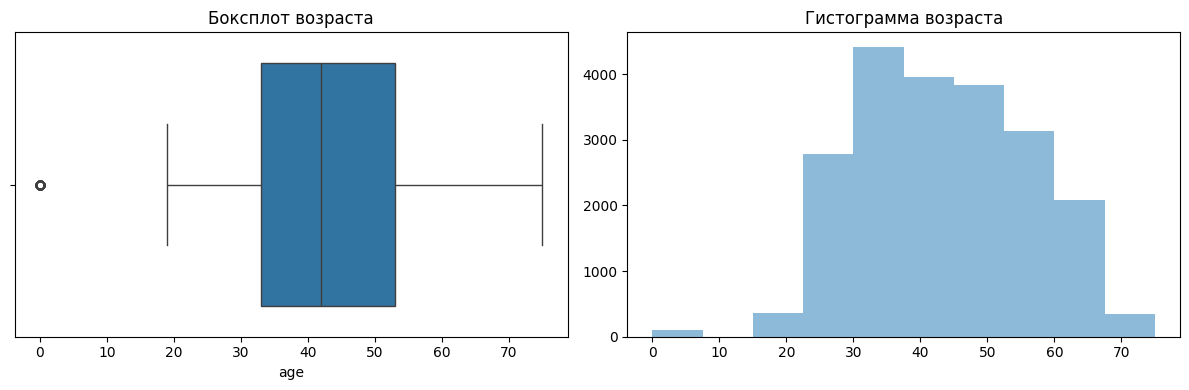

In [ ]:
#визуализация боксплота и график распределения возраста
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['age'])
plt.title('Боксплот возраста')
plt.subplot(1, 2, 2)
plt.hist(df['age'], alpha=0.5)
plt.title('Гистограмма возраста')
plt.tight_layout()
plt.show()

In [ ]:
#количесвто несовершенолетних клиентов :)
len(df[df['age'] < 18])

99

In [ ]:
df[df['age'] < 18].describe()

,children,days_employed,age,education_id,family_status_id,gender,debt,total_income,purpose_id
count,99.000000,99.000000,99.0,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,0.484848,74790.949495,0.0,0.666667,1.262626,0.707071,0.080808,156414.828283,1.252525
std,0.800046,145499.622596,0.0,0.515079,1.529211,0.457422,0.273927,71737.062885,0.951298
min,0.000000,108.000000,0.0,0.000000,0.000000,0.000000,0.000000,34974.000000,0.000000
25%,0.000000,966.500000,0.0,0.000000,0.000000,0.000000,0.000000,101855.500000,1.000000
50%,0.000000,1720.000000,0.0,1.000000,1.000000,1.000000,0.000000,144127.000000,1.000000
75%,1.000000,5493.500000,0.0,1.000000,3.000000,1.000000,0.000000,204285.000000,2.000000
max,3.000000,400992.000000,0.0,2.000000,4.000000,1.000000,1.000000,386373.000000,3.000000


In [ ]:
#проверим возраст клиентов чуть старше 18
df[(df['age'] <= 24) & (df['age'] > 18)].describe()

,children,days_employed,age,education_id,family_status_id,gender,debt,total_income,purpose_id
count,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000
mean,0.292683,1230.775842,22.595819,0.947735,1.960511,0.571429,0.102207,141080.830430,1.257840
std,0.543721,11393.913137,1.286488,0.634885,1.785815,0.495159,0.303096,67650.235931,0.901394
min,0.000000,51.000000,19.000000,0.000000,0.000000,0.000000,0.000000,32628.000000,0.000000
25%,0.000000,389.000000,22.000000,1.000000,0.000000,0.000000,0.000000,97629.000000,1.000000
50%,0.000000,756.000000,23.000000,1.000000,1.000000,1.000000,0.000000,127677.000000,1.000000
75%,1.000000,1177.000000,24.000000,1.000000,4.000000,1.000000,0.000000,167065.000000,2.000000
max,4.000000,334764.000000,24.000000,3.000000,4.000000,1.000000,1.000000,658754.000000,3.000000


In [ ]:
#удалим записи где клиентам 0 лет
df = df[df['age'] != 0]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20897 entries, 0 to 21524
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   children            20897 non-null  int64   
 1   days_employed       20897 non-null  int64   
 2   age                 20897 non-null  int64   
 3   education           20897 non-null  category
 4   education_id        20897 non-null  int64   
 5   family_status       20897 non-null  category
 6   family_status_id    20897 non-null  int64   
 7   gender              20897 non-null  int64   
 8   income_type         20897 non-null  category
 9   debt                20897 non-null  int64   
 10  total_income        20897 non-null  int64   
 11  purpose_category    20897 non-null  category
 12  purpose_id          20897 non-null  int64   
 13  days_employed_flag  20897 non-null  bool    
dtypes: bool(1), category(4), int64(9)
memory usage: 1.7 MB


Вернемся к `days_employed`

### коррекция аномальных значений методом случайного леса

In [ ]:
df[df['days_employed'] >= 26000].describe()

,children,days_employed,age,education_id,family_status_id,gender,debt,total_income,purpose_id
count,3693.000000,3693.000000,3693.000000,3693.000000,3693.000000,3693.000000,3693.000000,3693.000000,3693.000000
mean,0.090171,365010.325751,59.374763,0.913079,0.992418,0.813972,0.058489,136369.235852,1.200379
std,0.324585,20317.621391,6.328950,0.517070,1.318239,0.389182,0.234698,77779.640057,0.897468
min,0.000000,328728.000000,22.000000,0.000000,0.000000,0.000000,0.000000,20667.000000,0.000000
25%,0.000000,348135.000000,56.000000,1.000000,0.000000,1.000000,0.000000,85742.000000,1.000000
50%,0.000000,365028.000000,60.000000,1.000000,0.000000,1.000000,0.000000,117993.000000,1.000000
75%,0.000000,381593.000000,64.000000,1.000000,2.000000,1.000000,0.000000,165724.000000,2.000000
max,4.000000,401755.000000,74.000000,4.000000,4.000000,1.000000,1.000000,735103.000000,3.000000


In [ ]:
#вставим пропуски вместо аномальных значений
df.loc[df['days_employed'] >= 26000, 'days_employed'] = np.nan

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20897 entries, 0 to 21524
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   children            20897 non-null  int64   
 1   days_employed       17204 non-null  float64 
 2   age                 20897 non-null  int64   
 3   education           20897 non-null  category
 4   education_id        20897 non-null  int64   
 5   family_status       20897 non-null  category
 6   family_status_id    20897 non-null  int64   
 7   gender              20897 non-null  int64   
 8   income_type         20897 non-null  category
 9   debt                20897 non-null  int64   
 10  total_income        20897 non-null  int64   
 11  purpose_category    20897 non-null  category
 12  purpose_id          20897 non-null  int64   
 13  days_employed_flag  20897 non-null  bool    
dtypes: bool(1), category(4), float64(1), int64(8)
memory usage: 1.7 MB


In [ ]:
#загрузим из библиотеки sklearn рандомный лес
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#используем все существующие данные days_employed для обучения модели
train_data = df[df['days_employed'].notna()]
missing_data = df[df['days_employed'].isna()]

In [ ]:
#разделим тренировычные данные на независимые переменные и таргет
X_train = train_data[['children', 'age', 'education_id', 'family_status_id', 'gender', 'total_income']]
y_train = train_data['days_employed']

In [ ]:
#обучим модель
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
#сделаем предсказание
X_missing = missing_data[['children', 'age', 'education_id', 'family_status_id', 'gender', 'total_income']]
predicted_values = rf.predict(X_missing)

In [ ]:
df.loc[df['days_employed'].isna(), 'days_employed'] = predicted_values

In [ ]:
#посмотрим пропуски
print(df['days_employed'].isnull().sum())

0


In [ ]:
#посмотрим данные days_employed на которых 'стоит флаг'
df[df['days_employed_flag'] == True].head(20)

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose_category,purpose_id,days_employed_flag
4,0,2291.7200,53,среднее,1,гражданский брак,1,1,пенсионер,0,158616,свадьба,3,True
12,0,3153.7900,65,среднее,1,гражданский брак,1,0,пенсионер,0,119506,свадьба,3,True
18,0,2554.4040,53,среднее,1,вдовец / вдова,2,1,пенсионер,0,56823,автомобиль,0,True
24,1,8127.8500,57,среднее,1,не женат / не замужем,4,1,пенсионер,0,290547,недвижимость,1,True
25,0,3094.1100,67,среднее,1,женат / замужем,0,0,пенсионер,0,55112,недвижимость,1,True
26,0,2921.0000,41,среднее,1,женат / замужем,0,0,госслужащий,0,137233,образование,2,True
29,0,4592.8200,63,среднее,1,не женат / не замужем,4,1,пенсионер,0,166735,недвижимость,1,True
30,1,7479.4400,62,среднее,1,женат / замужем,0,1,пенсионер,0,171456,недвижимость,1,True
35,0,2334.5400,68,среднее,1,гражданский брак,1,0,пенсионер,0,77805,свадьба,3,True
41,0,3376.0000,50,среднее,1,женат / замужем,0,1,госслужащий,0,113163,автомобиль,0,True


Выглядит неплохо. Точно лучше чем было

### распределение общего дохода и категоризация данных

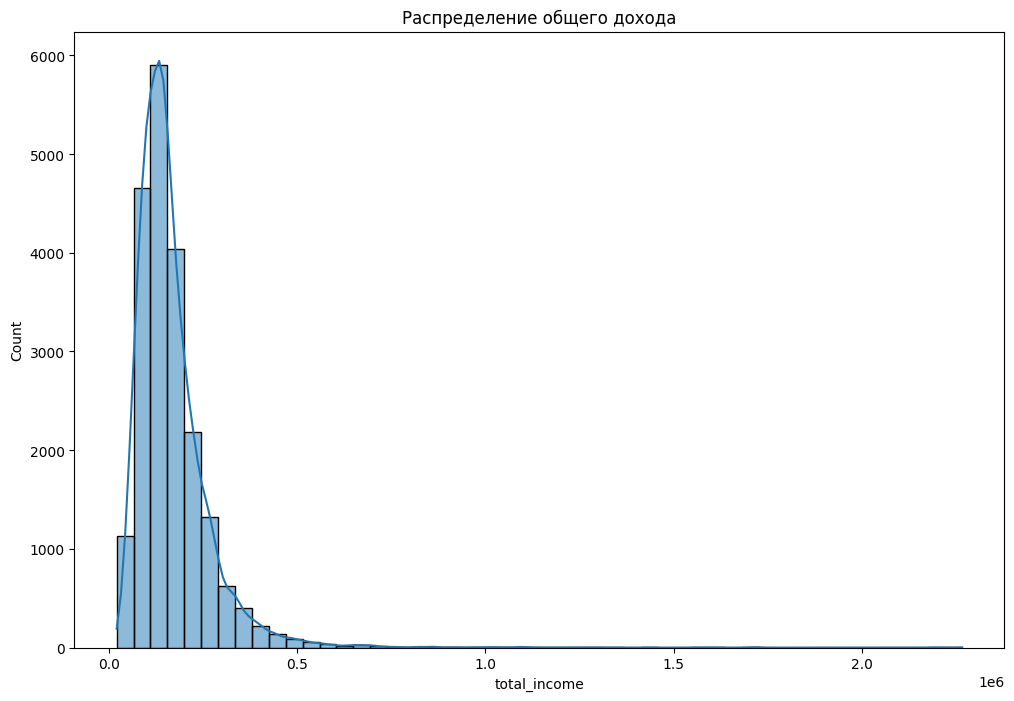

In [ ]:
#грпфик распределение общего дохода
plt.figure(figsize = (12,8))
sns.histplot(df['total_income'], kde=True, bins=50, alpha=0.5)
plt.title('Распределение общего дохода')
plt.show()

In [ ]:
#разбиваем значения на квинтили и присваиваем каждой группе категориальную метку
df['income_group'] = pd.qcut(df['total_income'], q=5, labels=['Очень низкий', 'Низкий', 'Средний', 'Высокий', 'Очень высокий'])

In [ ]:
df['income_group'].value_counts()

,count
income_group,
Очень низкий,4180
Очень высокий,4180
Низкий,4179
Средний,4179
Высокий,4179


<Axes: xlabel='income_group', ylabel='debt'>

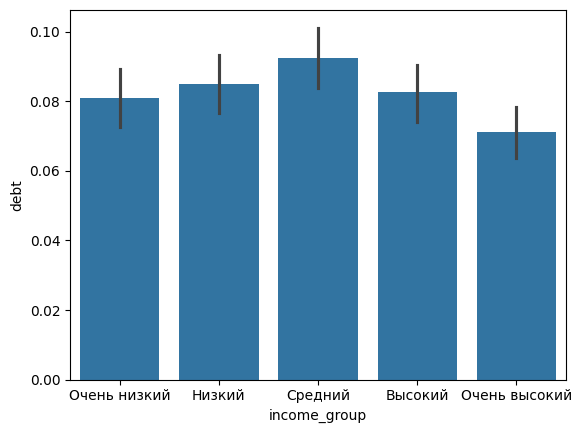

In [ ]:
#строим столбчатую диаграмму квинтелей относительно задолженности
sns.barplot(data=df, x='income_group', y='debt')

# Ответы на вопросы

### графики, подготовка функций

In [ ]:
df_info(df)

,Column,Dtype,Memory (MB)
children,children,int64,0.159431
days_employed,days_employed,float64,0.159431
age,age,int64,0.159431
education,education,category,0.020697
education_id,education_id,int64,0.159431
family_status,family_status,category,0.020762
family_status_id,family_status_id,int64,0.159431
gender,gender,int64,0.159431
income_type,income_type,category,0.021152
debt,debt,int64,0.159431


In [ ]:
df[['children', 'days_employed', 'age', 'total_income']].describe()

,children,days_employed,age,total_income
count,20897.000000,20897.000000,20897.000000,2.089700e+04
mean,0.477246,2593.997786,43.420491,1.662670e+05
std,0.754245,2235.317646,12.247707,9.963926e+04
min,0.000000,24.000000,19.000000,2.066700e+04
25%,0.000000,985.000000,33.000000,1.058640e+05
50%,0.000000,1986.000000,42.000000,1.444000e+05
75%,1.000000,3546.680000,53.000000,1.995440e+05
max,5.000000,18388.000000,75.000000,2.265604e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20897 entries, 0 to 21524
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   children            20897 non-null  int64   
 1   days_employed       20897 non-null  float64 
 2   age                 20897 non-null  int64   
 3   education           20897 non-null  category
 4   education_id        20897 non-null  int64   
 5   family_status       20897 non-null  category
 6   family_status_id    20897 non-null  int64   
 7   gender              20897 non-null  int64   
 8   income_type         20897 non-null  category
 9   debt                20897 non-null  int64   
 10  total_income        20897 non-null  int64   
 11  purpose_category    20897 non-null  category
 12  purpose_id          20897 non-null  int64   
 13  days_employed_flag  20897 non-null  bool    
 14  income_group        20897 non-null  category
dtypes: bool(1), category(5), float64(1), int6

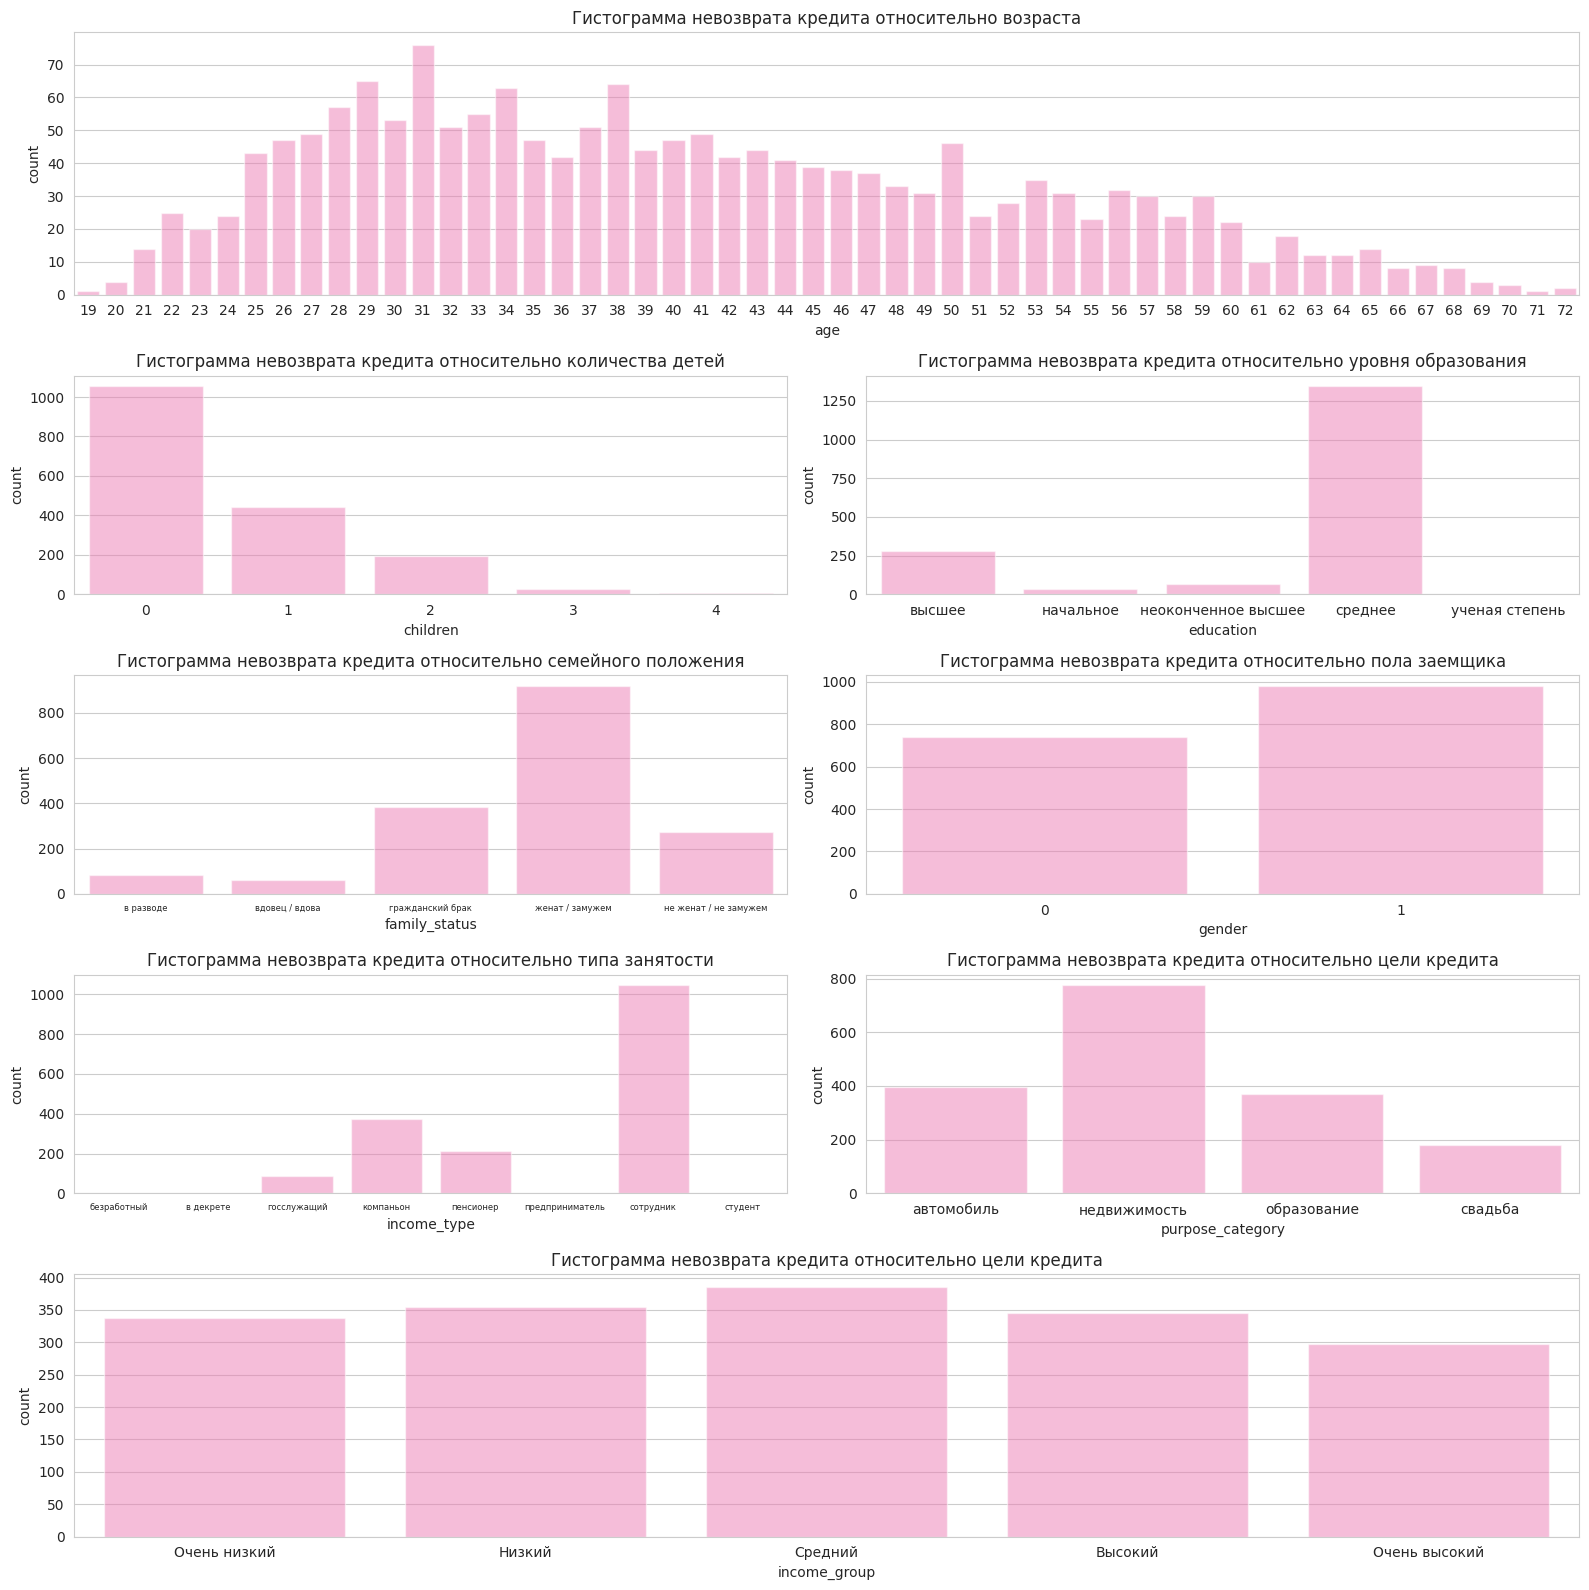

In [ ]:
#строим серию гистограмм, чтобы наглядно изучить, как различные социально-демографические характеристики (возраст, пол, образование, семейное положение и др.)
#связаны с фактами невозврата кредита. Это поможет выявить потенциальные группы риска и лучше понять структуру должников.


sns.set_style("whitegrid")
sns.set_palette(["#ff69b4"])

plt.figure(figsize=(16,16))
gs = GridSpec(5,2, height_ratios=[1.2, 1, 1, 1, 1.2])

plt.subplot(gs[0, :])
sns.countplot(x=df[df['debt'] == 1]['age'],  alpha=0.5)
plt.title('Гистограмма невозврата кредита относительно возраста')

plt.subplot(gs[1, 0])
sns.countplot(x=df[df['debt'] == 1]['children'],  alpha=0.5)
plt.title('Гистограмма невозврата кредита относительно количества детей')

plt.subplot(gs[1, 1])
sns.countplot(x=df[df['debt'] == 1]['education'],  alpha=0.5)
plt.title('Гистограмма невозврата кредита относительно уровня образования')

plt.subplot(gs[2, 0])
sns.countplot(x=df[df['debt'] == 1]['family_status'],  alpha=0.5)
plt.xticks(fontsize=6)
plt.title('Гистограмма невозврата кредита относительно семейного положения')

plt.subplot(gs[2, 1])
sns.countplot(x=df[df['debt'] == 1]['gender'],  alpha=0.5)
plt.title('Гистограмма невозврата кредита относительно пола заемщика')

plt.subplot(gs[3, 0])
sns.countplot(x=df[df['debt'] == 1]['income_type'],  alpha=0.5)
plt.xticks(fontsize=6)
plt.title('Гистограмма невозврата кредита относительно типа занятости')

plt.subplot(gs[3, 1])
sns.countplot(x=df[df['debt'] == 1]['purpose_category'],  alpha=0.5)
plt.title('Гистограмма невозврата кредита относительно цели кредита')

plt.subplot(gs[4, :])
sns.countplot(x=df[df['debt'] == 1]['income_group'],  alpha=0.5)
plt.title('Гистограмма невозврата кредита относительно цели кредита')

plt.tight_layout()

plt.show()

Резюме:
* Текущие графики показывают структуру выборки, не риск дефолта.
* Надо перейти от raw counts к пропорциям.


In [ ]:
df.groupby('education_id')['education'].unique()

,education
education_id,
0,"['высшее'] Categories (5, object): ['высшее', ..."
1,"['среднее'] Categories (5, object): ['высшее',..."
2,"['неоконченное высшее'] Categories (5, object)..."
3,"['начальное'] Categories (5, object): ['высшее..."
4,"['ученая степень'] Categories (5, object): ['в..."


In [ ]:
df.groupby('family_status_id')['family_status'].unique()

,family_status
family_status_id,
0,"['женат / замужем'] Categories (5, object): ['..."
1,"['гражданский брак'] Categories (5, object): [..."
2,"['вдовец / вдова'] Categories (5, object): ['в..."
3,"['в разводе'] Categories (5, object): ['в разв..."
4,"['не женат / не замужем'] Categories (5, objec..."


`gender: 1 - f, 0 - m`

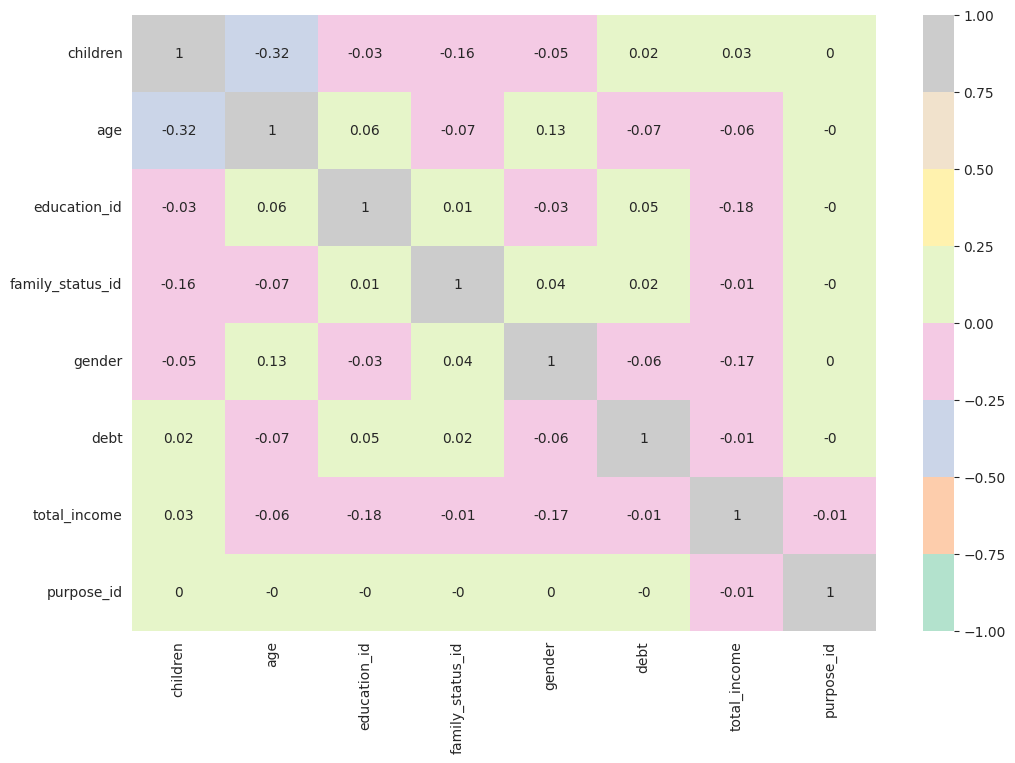

In [ ]:
#вычисляем корреляционную матрицу только для числовых столбцов типа int64 и округляем значения до 2 знаков
corr_matrix = round(df[df.select_dtypes(include=['int64']).columns].corr(), 2)

#создаём тепловую карту корреляции
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,
            vmin=-1, vmax=1,
            cmap='Pastel2', annot=True)
plt.show()

Значение коэффициентов корреляций очень низкие, связи с перменной `debt` слабые. Но, если анализировать даже слабые связи, то можно заметить противоречия со столбчатыми графиками, которые были построены ранее. Из этого можно сделать вывод, что данные непропорциональны и на простом подсчете суммы случаев невозврата в той или иной категории клиентов - делать вывод нельзя. Данные не репрезентативные.  

In [ ]:
#словарь для переменных и их заголовков
variables = {
    'gender': 'Распределение по полу',
    'children': 'Распределение по количеству детей',
    'education': 'Распределение по образованию',
    'family_status': 'Распределение по семейному положению',
    'income_type': 'Распределение по типу занятости',
    'purpose_category': 'Распределение по цели кредита',
    'income_group': 'Распределение по уровню дохода'
}

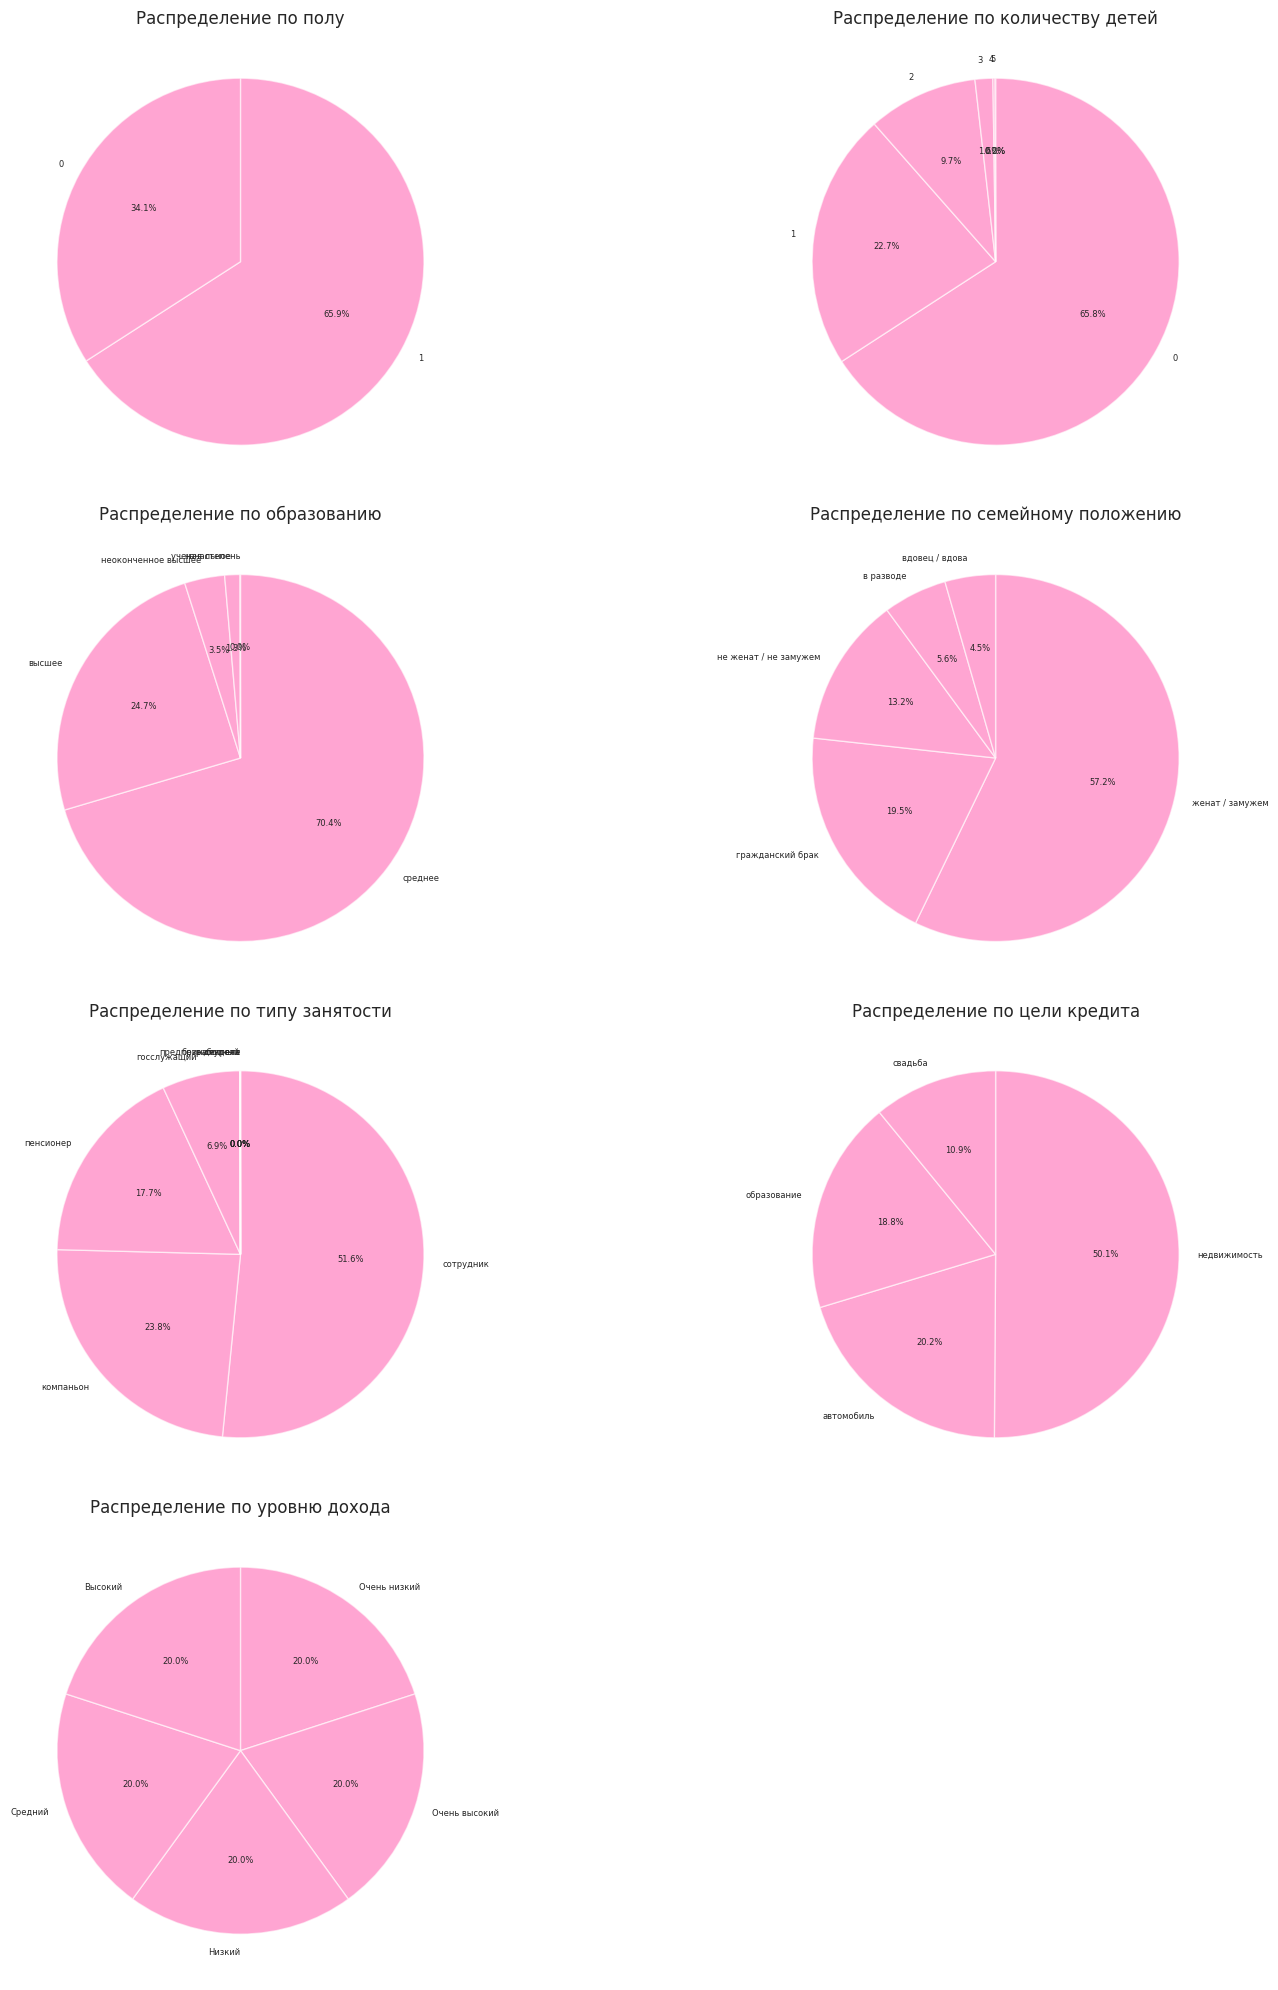

In [ ]:
#проходим по каждому столбцу и его заголовку в словаре и строим круговую диаграмму
plt.figure(figsize=(16, 20))

for i, (var, title) in enumerate(variables.items(), 1):
    plt.subplot(4, 2, i)
    df[var].value_counts(normalize=True).plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False,
        textprops={'fontsize': 6},
        wedgeprops={'alpha':0.6}
    )
    plt.title(title, fontsize=12)
    plt.ylabel('')

plt.tight_layout()
plt.show()

В представленных данных наблюдается значительная несбалансированность классов практически во всех категориях. Это может привести к следующим проблемам:  Модели машинного обучения будут игнорировать редкие случаи (например, 2+ детей), снижая их предсказательную способность для меньшинства. Редкие классы могут быть ошибочно классифицированы как шум.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20897 entries, 0 to 21524
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   children            20897 non-null  int64   
 1   days_employed       20897 non-null  float64 
 2   age                 20897 non-null  int64   
 3   education           20897 non-null  category
 4   education_id        20897 non-null  int64   
 5   family_status       20897 non-null  category
 6   family_status_id    20897 non-null  int64   
 7   gender              20897 non-null  int64   
 8   income_type         20897 non-null  category
 9   debt                20897 non-null  int64   
 10  total_income        20897 non-null  int64   
 11  purpose_category    20897 non-null  category
 12  purpose_id          20897 non-null  int64   
 13  days_employed_flag  20897 non-null  bool    
 14  income_group        20897 non-null  category
dtypes: bool(1), category(5), float64(1), int6

In [ ]:
#debt_by_children = (
#    df.groupby('children').agg(
#        total_debt=('debt', 'sum'),
#        num_of_clients=('debt', 'count')
#    ).assign(percent=lambda x: round((x.total_debt / x.num_of_clients * 100), 2),
#             percent2=lambda x: round(x.total_debt / df['debt'].sum() * 100, 2))
#).reset_index()
#
#debt_by_children.rename(columns={
#        'children': 'Количество детей',
#        'total_debt': 'Просрочки в группе',
#        'num_of_clients': 'Всего клиентов',
#        'percent': '% просрочек внутри группы',
#        'percent2': '% от всех просрочек'
#    })

In [ ]:
def debtbycategory(categories, names):

  '''
    функция debtbycategory анализирует, как различается доля просрочек по заданным категориям клиентов.
    принимает два списка:
    - categories: список названий колонок в датафрейме (категориальные переменные)
    - names: список названий для этих категорий

    для каждой категории создаётся таблица с:
    - общим количеством клиентов в категории
    - числом клиентов с просрочками
    - процентом просрочек внутри категории
    - процентом от всех просрочек

    возвращает список датафреймов с результатами анализа по каждой категории
  '''

  all = []

  for category, name in zip(categories, names):
    debt_by_category = (
        df.groupby(category)
        .agg(
            total_debt=('debt', 'sum'),
            num_of_clients=('debt', 'count')
            )
        .assign(
            percent=lambda x: round((x.total_debt / x.num_of_clients * 100), 2),
            percent2=lambda x: round(x.total_debt / df['debt'].sum() * 100, 2)
            )
            ).reset_index().rename(
        columns={
                category: name,
                'total_debt': 'Просрочки в группе',
                'num_of_clients': 'Всего клиентов',
                'percent': '% просрочек внутри группы',
                'percent2': '% от всех просрочек'
                }
        )
    all.append(debt_by_category)
  return all


In [ ]:
#список колонок и наименований к ним
categories = df[['children', 'family_status', 'education', 'income_type', 'purpose_category', 'income_group']]
names = ['Количество детей', 'Семейное положение', 'Образование', 'Тип дохода', 'Цель кредита', 'Уровень дохода']

**Ответы на вопросы**

1. **Есть ли зависимость между наличием детей и возвратом кредита в срок?**
2. **Есть ли зависимость между семейным положением и возвратом кредита в срок?**
3. **Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**
4. **Как разные цели кредита влияют на его возврат в срок?**


### Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [ ]:
debtbycategory(categories, names)[0]

<ipython-input-149-6eba5e74f23f>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(category)
<ipython-input-149-6eba5e74f23f>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(category)
<ipython-input-149-6eba5e74f23f>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(category)
<ipython-input-149-6eba5e74f23f>:6: FutureWarning: The default of observed=False is deprecated and will be changed 

,Количество детей,Просрочки в группе,Всего клиентов,% просрочек внутри группы,% от всех просрочек
0,0,1056,13760,7.67,61.32
1,1,441,4735,9.31,25.61
2,2,194,2026,9.58,11.27
3,3,27,327,8.26,1.57
4,4,4,40,10.00,0.23
5,5,0,9,0.00,0.00


In [ ]:
#сравнение доли просрочек между клиентами с детьми и без
debt_by_children_binary = (
    df.assign(has_children=lambda x: np.where(x['children'] > 0, 'есть дети', 'нет детей'))
    .groupby('has_children')
    .agg(
        total_debt=('debt', 'sum'),
        num_of_clients=('debt', 'count')
    ).assign(
        percent_in_group=lambda x: round(x.total_debt / x.num_of_clients * 100, 2),
        percent_of_total_debt=lambda x: round(x.total_debt / df['debt'].sum() * 100, 2)
    )
    .reset_index())


debt_by_children_binary.rename(columns={
        'has_children': 'Наличие детей',
        'total_debt': 'Просрочки',
        'num_of_clients': 'Клиентов',
        'percent_in_group': '% в группе',
        'percent_of_total_debt': '% от всех просрочек'
    })

,Наличие детей,Просрочки,Клиентов,% в группе,% от всех просрочек
0,есть дети,666,7137,9.33,38.68
1,нет детей,1056,13760,7.67,61.32


In [ ]:
#z-тест для сравнения долей просрочек у групп с детьми и без
group_no = debt_by_children_binary[debt_by_children_binary['has_children'] == 'нет детей']
group_yes = debt_by_children_binary[debt_by_children_binary['has_children'] == 'есть дети']

In [ ]:
counts = [group_no['total_debt'].values[0], group_yes['total_debt'].values[0]]
nobs = [group_no['num_of_clients'].values[0], group_yes['num_of_clients'].values[0]]

In [ ]:
z_stat, p_value = proportions_ztest(count=counts, nobs=nobs, alternative='two-sided')

In [ ]:
print(f"Результаты Z-теста: z-stat {z_stat:.3f}, p-value = {p_value:.6f}")

Результаты Z-теста: z-stat -4.132, p-value = 0.000036


 **Анализ зависимости между наличием детей и вероятностью просрочки**

Мы провели Z-тест для сравнения долей просроченных платежей между двумя группами клиентов: с детьми и без детей. Результаты:

- **Клиенты с детьми**: 666 просрочек из 7137 клиентов (≈ **9.33%**)
- **Клиенты без детей**: 1056 просрочек из 13,760 клиентов (≈ **7.67%**)
- **Z-статистика**: -4.132
- **p-value**: 0.000036

---

 **Интерпретация**

С полученным p-value < 0.001, мы отвергаем нулевую гипотезу о равенстве долей просрочек между группами. Разница в долях статистически значима и не может быть объяснена случайными колебаниями выборки.

Формально: **клиенты с детьми имеют существенно более высокий процент просрочек по сравнению с клиентами без детей**.

---

 **Вывод**

- **Наличие детей** является потенциально важным предиктором кредитного риска.
- Возможно, эта характеристика стоит учитывать при разработке скоринговых моделей, особенно в сегментах без дополнительной поддержки (например, для одиноких родителей).
- Но важно отметить: наличие детей само по себе не обязательно _причина_, а скорее _индикатор_, связанный с другими факторами (например, уровнем расходов, финансовой нагрузкой).

---


### Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [ ]:
debtbycategory(categories, names)[1]

<ipython-input-149-6eba5e74f23f>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(category)
<ipython-input-149-6eba5e74f23f>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(category)
<ipython-input-149-6eba5e74f23f>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(category)
<ipython-input-149-6eba5e74f23f>:6: FutureWarning: The default of observed=False is deprecated and will be changed 

,Семейное положение,Просрочки в группе,Всего клиентов,% просрочек внутри группы,% от всех просрочек
0,в разводе,84,1177,7.14,4.88
1,вдовец / вдова,62,930,6.67,3.60
2,гражданский брак,383,4085,9.38,22.24
3,женат / замужем,921,11951,7.71,53.48
4,не женат / не замужем,272,2754,9.88,15.80


In [ ]:
debt_by_family_status_binary = (
    df.assign(has_partner=lambda x: np.where((x['family_status_id'] <= 0), 'есть партнер', 'одинок(а)'))
    .groupby('has_partner')
    .agg(
        total_debt=('debt', 'sum'),
        num_of_clients=('debt', 'count')
    ).assign(
        percent1=lambda x: round(x.total_debt / x.num_of_clients * 100, 2),
        percent2=lambda x: round(x.total_debt / df['debt'].sum() * 100, 2)
    )
    .reset_index())


debt_by_family_status_binary.rename(columns={
        'has_partner': 'Наличие партнера',
        'total_debt': 'Просрочки внутри группы',
        'num_of_clients': 'Всего клиентов',
        'percent1': '% просрочек в группе',
        'percent2': '% от всех просрочек'
    })

,Наличие партнера,Просрочки внутри группы,Всего клиентов,% просрочек в группе,% от всех просрочек
0,есть партнер,921,11951,7.71,53.48
1,одинок(а),801,8946,8.95,46.52


Группы по количеству клиентов сопоставимы, разница в долях просрочек невелика (7.71% vs 8.95%) и может быть статистически несущественной.

In [ ]:
df.groupby('family_status')['family_status_id'].unique()

<ipython-input-159-5162855a59ae>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('family_status')['family_status_id'].unique()


,family_status_id
family_status,
в разводе,[3]
вдовец / вдова,[2]
гражданский брак,[1]
женат / замужем,[0]
не женат / не замужем,[4]


In [ ]:
#создаем бинарную переменную, разделяющую клиентов по признаку наличия официально оформленных отношений
#затем рассчитываем количество просрочек, общее число клиентов и долю просрочек в каждой из двух групп

debt_by_family_status_binary2 = (
    df.assign(official_partner=lambda x: np.where(
        x['family_status_id'].isin([1, 4]),
        'Без официального статуса',
        'С официальным семейным статусом'
    ))
    .groupby('official_partner')
    .agg(
        total_debt=('debt', 'sum'),
        num_of_clients=('debt', 'count')
    )
    .assign(
        percent1=lambda x: round(x.total_debt / x.num_of_clients * 100, 2),
        percent2=lambda x: round(x.total_debt / df['debt'].sum() * 100, 2)
    )
    .reset_index()
)

debt_by_family_status_binary2 = debt_by_family_status_binary2.rename(columns={
    'official_partner': 'Юридически оформленный статус отношений',
    'total_debt': 'Просрочки внутри группы',
    'num_of_clients': 'Всего клиентов',
    'percent1': '% просрочек в группе',
    'percent2': '% от всех просрочек'
})

debt_by_family_status_binary2


,Юридически оформленный статус отношений,Просрочки внутри группы,Всего клиентов,% просрочек в группе,% от всех просрочек
0,Без официального статуса,655,6839,9.58,38.04
1,С официальным семейным статусом,1067,14058,7.59,61.96


In [ ]:
group_ofic = debt_by_family_status_binary2[debt_by_family_status_binary2['Юридически оформленный статус отношений'] == 'С официальным семейным статусом']
group_notofic = debt_by_family_status_binary2[debt_by_family_status_binary2['Юридически оформленный статус отношений'] == 'Без официального статуса']

In [ ]:
counts2 = [group_ofic['Просрочки внутри группы'].values[0], group_notofic['Просрочки внутри группы'].values[0]]
nobs2 = [group_ofic['Всего клиентов'].values[0], group_notofic['Всего клиентов'].values[0]]

In [ ]:
z_stat2, p_value2 = proportions_ztest(count=counts2, nobs=nobs2, alternative='two-sided')

In [ ]:
print(f"Результаты Z-теста: z-stat {z_stat2:.3f}, p-value = {p_value2:.6f}")

Результаты Z-теста: z-stat -4.902, p-value = 0.000001


**Анализ зависимости между семейным положением и вероятностью просрочки**

Мы провели Z-тест для сравнения долей просроченных платежей между двумя агрегированными группами клиентов на основе их семейного положения:

- **С официальным семейным статусом**: женат/замужем, в разводе, вдовец/вдова  
- **Без официального статуса**: не женат/не замужем, гражданский брак


Агрегирование категорий проведено как на **основании бизнес-логики**, так и **статистических соображений**:

- С точки зрения поведения, наличие официально оформленных отношений предполагает склонность к большей ответственности в вопросах, связанных с **обязательствами и документооборотом**, включая финансы и кредитование.
- Первичный анализ показал, что другие способы агрегирования (например, наличие партнёра vs. одиночка) дают близкие по значениям доли просрочек и не выявляют контрастных различий.
- Также в исходных данных категории существенно различаются по численности, что может затруднить корректное сравнение и повлиять на результаты анализа. Объединение позволило создать **сбалансированные и интерпретируемые группы**, обеспечив надёжность статистического теста.

---

**Результаты анализа**

| Группа                             | Просрочек | Клиентов | % просрочек |
|-----------------------------------|-----------|----------|--------------|
| С официальным семейным статусом   | 1067      | 14,058   | **7.59%**     |
| Без официального статуса          | 655       | 6,839    | **9.58%**     |

- **Z-статистика**: -4.902  
- **p-value**: 0.000001

---

**Интерпретация**

Полученное **p-value < 0.001** даёт основание **отвергнуть нулевую гипотезу**: между группами существует статистически значимая разница в долях просрочек.

Клиенты, **не состоящие в официальных отношениях**, демонстрируют **значимо более высокий уровень просрочек** по сравнению с теми, кто состоит или состоял в юридически оформленном браке. Это наблюдение не является случайностью и устойчиво к эффектам выборки.

Важно: мы не утверждаем, что наличие официального статуса **причинно** снижает риск просрочки. Однако он, вероятно, является **индикатором** других факторов — таких как социальная и финансовая стабильность, ответственность, уровень финансовой нагрузки, готовность к долгосрочным обязательствам.

---

**Вывод**

*Семейное положение в виде юридически оформленных отношений может служить косвенным, но значимым индикатором кредитной надёжности.*

* Рекомендуется **учитывать эту переменную** в скоринговых моделях и алгоритмах оценки риска — особенно в случаях, когда недоступны более прямые индикаторы (например, кредитная история, платёжный рейтинг).

* Для клиентов без официального статуса можно рассматривать **альтернативные механизмы контроля риска**: более высокая ставка, запрос поручительства, подключение страховки, увеличение доли первого взноса.

* В долгосрочной перспективе можно использовать данное наблюдение для **персонализированной коммуникации** и повышения удержания, предлагая клиентам из потенциально более рискованных сегментов обучающие материалы или гибкие графики платежей.


### Как разные цели кредита влияют на его возврат в срок?

In [ ]:
debtbycategory(categories, names)[4]

<ipython-input-149-6eba5e74f23f>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(category)
<ipython-input-149-6eba5e74f23f>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(category)
<ipython-input-149-6eba5e74f23f>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(category)
<ipython-input-149-6eba5e74f23f>:6: FutureWarning: The default of observed=False is deprecated and will be changed 

,Цель кредита,Просрочки в группе,Всего клиентов,% просрочек внутри группы,% от всех просрочек
0,автомобиль,396,4224,9.38,23.00
1,недвижимость,776,10471,7.41,45.06
2,образование,369,3921,9.41,21.43
3,свадьба,181,2281,7.94,10.51


In [ ]:
#   columns={
#                category: name,
#                'total_debt': 'Просрочки в группе',
#                'num_of_clients': 'Всего клиентов',
#                'percent': '% просрочек внутри группы',
#                'percent2': '% от всех просрочек'
#                }

In [ ]:
chi2_data = debtbycategory(categories, names)[4]

<ipython-input-149-6eba5e74f23f>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(category)
<ipython-input-149-6eba5e74f23f>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(category)
<ipython-input-149-6eba5e74f23f>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(category)
<ipython-input-149-6eba5e74f23f>:6: FutureWarning: The default of observed=False is deprecated and will be changed 

In [ ]:
chi2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Цель кредита               4 non-null      category
 1   Просрочки в группе         4 non-null      int64   
 2   Всего клиентов             4 non-null      int64   
 3   % просрочек внутри группы  4 non-null      float64 
 4   % от всех просрочек        4 non-null      float64 
dtypes: category(1), float64(2), int64(2)
memory usage: 468.0 bytes


In [ ]:
#подготовка данных для теста хи-квадрат и его проведение

chi2_data = chi2_data[['Просрочки в группе', 'Всего клиентов']]

chi2_data['Без просрочек'] = chi2_data['Всего клиентов'] - chi2_data['Просрочки в группе']

chi2_data = chi2_data[['Просрочки в группе', 'Без просрочек']]

In [ ]:
chi2_stat, p_val_chi2, dof, expected = chi2_contingency(chi2_data)

In [ ]:
print(f"χ² statistic: {chi2_stat:.3f}, p-value: {p_val_chi2:.6f}")

χ² statistic: 24.104, p-value: 0.000024


In [ ]:
chi2_data.index = ['автомобиль', 'недвижимость', 'образование', 'свадьба']

In [ ]:
expected_df = pd.DataFrame(expected, index=chi2_data.index, columns=chi2_data.columns)

In [ ]:
diff = chi2_data - expected_df

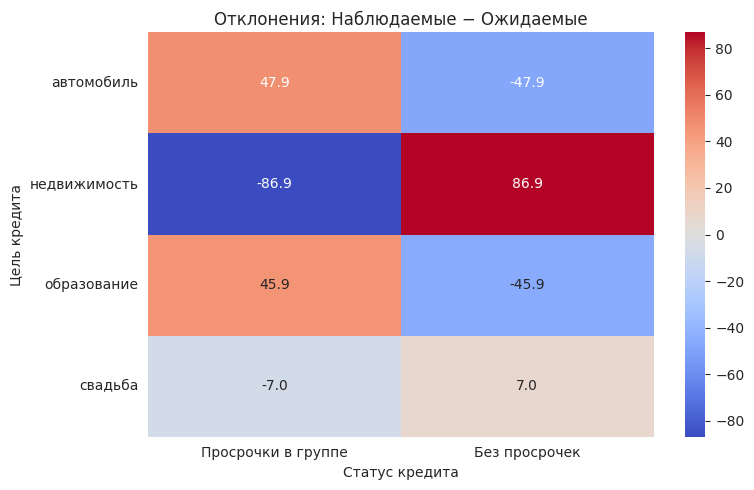

In [ ]:
#визуализация отклонений
plt.figure(figsize=(8, 5))
sns.heatmap(diff, annot=True, fmt=".1f", cmap="coolwarm", center=0)
plt.title("Отклонения: Наблюдаемые − Ожидаемые")
plt.xlabel("Статус кредита")
plt.ylabel("Цель кредита")
plt.tight_layout()
plt.show()

**Анализ зависимости между целью кредита и вероятностью просрочки**

**Исходные данные**

Мы рассматриваем 4 категории целей кредита:
- Автомобиль
- Недвижимость
- Образование
- Свадьба

Для каждой категории известны:
- Общее число клиентов
- Количество клиентов с просрочками

На их основе построена таблица сопряженности (просрочки / без просрочек), и проведён **χ²-тест независимости**.

---

**Результаты χ²-теста**

- **χ² статистика**: 24.104  
- **p-value**: 0.000024  
- **Степени свободы (dof)**: 3

**Вывод:**

Так как p-value < 0.001, мы с высокой степенью уверенности **отвергаем нулевую гипотезу**.  

Это означает, что **цель кредита статистически значимо связана с вероятностью просрочки**.

---

**Интерпретация различий (на основе тепловой карты отклонений: наблюдаемое – ожидаемое)**

| Цель кредита | Просрочки (отклонение) | Без просрочек (отклонение) | Интерпретация |
|--------------|-------------------------|------------------------------|----------------|
| **Автомобиль** | +47.9 | −47.9 | Просрочек больше, чем ожидалось — группа **рискованная** |
| **Недвижимость** | −86.9 | +86.9 | Просрочек **меньше**, чем ожидалось — **надежная группа** |
| **Образование** | +45.9 | −45.9 | Также **просрочек больше** — возможный риск |
| **Свадьба** | −7.0 | +7.0 | Почти без отклонений — **нейтральная группа** |

---

**Вывод:**

> **Цель кредита — значимый поведенческий индикатор** кредитного риска. Она отражает не только мотив клиента, но и его текущий жизненный контекст и финансовую стабильность.

- Заемщики, берущие кредит на **недвижимость**, демонстрируют **лучшие показатели платежной дисциплины**, чем ожидалось. Возможно, это обусловлено высокой стоимостью и долгим сроком таких займов, что привлекает более надёжных клиентов.
- В то же время цели "**автомобиль**" и особенно "**образование**" связаны с **повышенным риском просрочек**. Эти категории стоит дополнительно анализировать:
  - Например, молодежь, берущая кредит на образование, может не иметь стабильного дохода.
  - Автокредиты часто оформляют без первичного взноса и с низким порогом входа, что увеличивает риск.


**Рекомендации:**

- Добавить **"Цель кредита" как категориальный предиктор** в скоринговую модель.
- Рассмотреть **разное кредитное ценообразование (risk-based pricing)** или уровни допустимого лимита в зависимости от цели займа.
- В сегментах "образование" и "автомобиль" — возможно стоит применять более консервативные условия (например, запр ос подтверждения дохода, анализ расходов, ограничения по сумме).


### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [ ]:
debtbycategory(categories, names)[5]

<ipython-input-149-6eba5e74f23f>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(category)
<ipython-input-149-6eba5e74f23f>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(category)
<ipython-input-149-6eba5e74f23f>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(category)
<ipython-input-149-6eba5e74f23f>:6: FutureWarning: The default of observed=False is deprecated and will be changed 

,Уровень дохода,Просрочки в группе,Всего клиентов,% просрочек внутри группы,% от всех просрочек
0,Очень низкий,338,4180,8.09,19.63
1,Низкий,355,4179,8.49,20.62
2,Средний,386,4179,9.24,22.42
3,Высокий,345,4179,8.26,20.03
4,Очень высокий,298,4180,7.13,17.31


In [ ]:
income_data = debtbycategory(categories, names)[5]

<ipython-input-149-6eba5e74f23f>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(category)
<ipython-input-149-6eba5e74f23f>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(category)
<ipython-input-149-6eba5e74f23f>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(category)
<ipython-input-149-6eba5e74f23f>:6: FutureWarning: The default of observed=False is deprecated and will be changed 

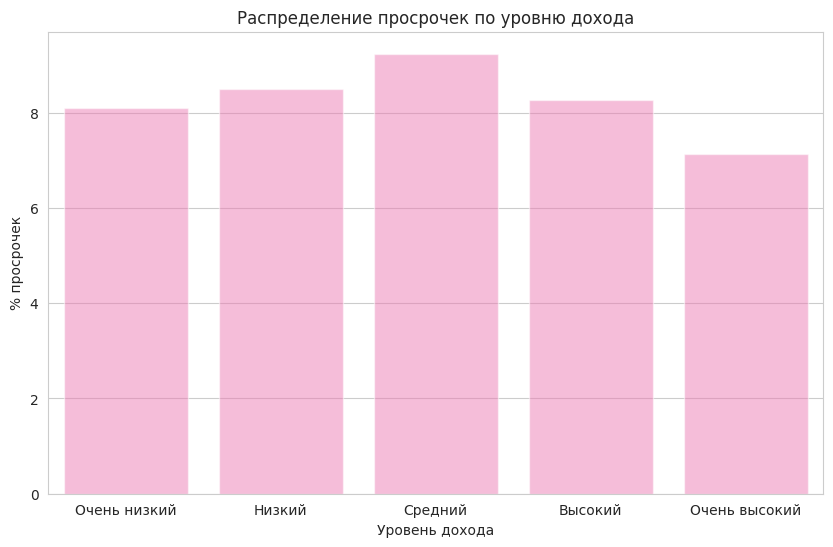

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=income_data['Уровень дохода'], y=income_data['% просрочек внутри группы'], alpha=0.5)

plt.title('Распределение просрочек по уровню дохода')
plt.xlabel('Уровень дохода')
plt.ylabel('% просрочек')

plt.show()

In [ ]:
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Уровень дохода             5 non-null      category
 1   Просрочки в группе         5 non-null      int64   
 2   Всего клиентов             5 non-null      int64   
 3   % просрочек внутри группы  5 non-null      float64 
 4   % от всех просрочек        5 non-null      float64 
dtypes: category(1), float64(2), int64(2)
memory usage: 509.0 bytes


In [ ]:
income_data = income_data[['Просрочки в группе', 'Всего клиентов']]

income_data['Без просрочек'] = income_data['Всего клиентов'] - income_data['Просрочки в группе']

income_data = income_data[['Просрочки в группе', 'Без просрочек']]

<ipython-input-189-51a923d72d71>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_data['Без просрочек'] = income_data['Всего клиентов'] - income_data['Просрочки в группе']


In [ ]:
chi2_stat2, p_val2, dof2, expected2 = chi2_contingency(income_data)

In [ ]:
print(f"χ² statistic: {chi2_stat2:.3f}, p-value: {p_val2:.6f}, dof: {dof2}")

χ² statistic: 12.802, p-value: 0.012283, dof: 4



**Результаты χ²-теста:**

- **χ²-статистика:** 12.802  
- **p-value:** 0.012283  
- **Степени свободы (dof):** 4  

---

**Интерпретация:**

С учетом p-value < 0.05, мы **отвергаем нулевую гипотезу** о том, что уровень дохода и наличие просрочки **независимы**. Это означает, что **уровень дохода статистически значимо связан с вероятностью просрочки**.

---

**Вывод:**

- **Кредитный риск варьируется в зависимости от уровня дохода.**
- Например, клиенты со средним уровнем дохода демонстрируют **наивысший процент просрочек (9.24%)**, в то время как клиенты с очень высоким доходом — **наименьший (7.13%)**.
- Несмотря на интуитивное ожидание, что просрочки будут убывать строго с ростом дохода, распределение **нелинейное**, и именно **"средний доход" — наиболее рискованная категория**.

Это может быть связано с тем, что клиенты с низким доходом осторожнее в заимствованиях, а клиенты со средним — более активно кредитуются, но еще не обладают достаточной подушкой безопасности. Поэтому:

> **Рекомендация:** стоит отдельно анализировать поведение заемщиков среднего уровня дохода — возможно, они недооцениваются в традиционных скоринговых моделях.

---


In [ ]:
expected_df2 = pd.DataFrame(expected2, columns=income_data.columns)

In [ ]:
deviation = income_data - expected_df2

In [ ]:
deviation.index = ['Очень низкий', 'Низкий', 'Средний', 'Высокий', 'Очень высокий']

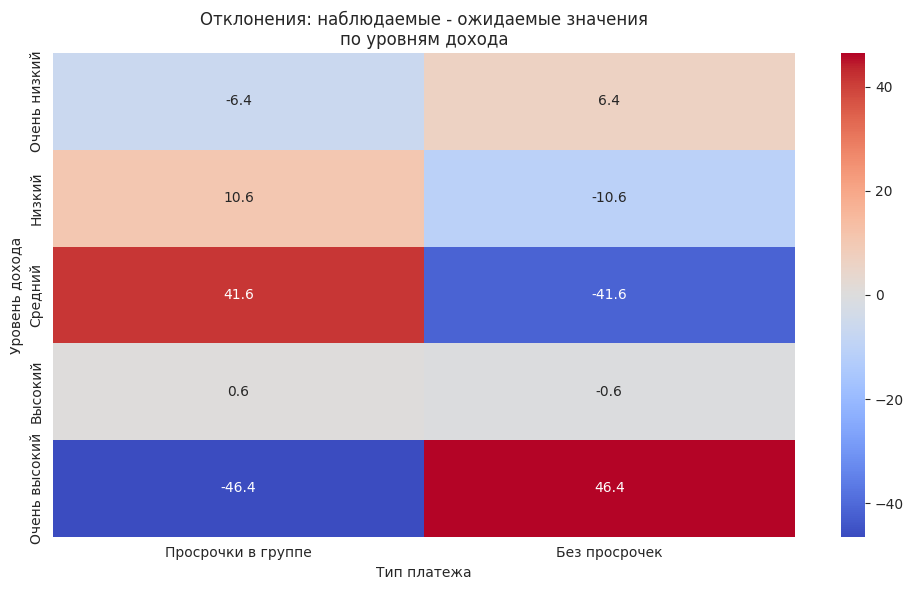

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(deviation, annot=True, fmt=".1f", cmap="coolwarm", center=0)

plt.title("Отклонения: наблюдаемые - ожидаемые значения\nпо уровням дохода")
plt.xlabel("Тип платежа")
plt.ylabel("Уровень дохода")
plt.tight_layout()
plt.show()

На тепловой карте отображены **разницы между наблюдаемыми и ожидаемыми значениями** количества клиентов с просрочками и без них:

- **Средний доход**:  
  - **На 41.6 клиентов больше** с просрочками, чем ожидалось.  
  - Значит, в этой категории **просрочек больше**, чем можно было бы ожидать при отсутствии связи с доходом.
  
- **Очень высокий доход**:  
  - **Просрочек на 46.4 меньше**, чем ожидалось.  
  - Это указывает на **низкую склонность к просрочкам** в этой группе.

- **Низкий доход** — небольшое положительное отклонение (+10.6), но менее выраженное.

- **Очень низкий доход** — небольшое отрицательное отклонение (-6.4).

- **Высокий доход** практически соответствует ожиданиям (отклонения ~0.6).

---

**Выводы:**

- Группа со **средним доходом** демонстрирует **наибольший вклад в χ²-статистику**, то есть она наиболее "аномальна" по сравнению с моделью независимости.
- **Очень высокие доходы** защищают от просрочек — значительно **меньше просрочек, чем ожидалось**.
- Эти данные могут быть полезны для настройки **скоринг-модели** или **таргетирования** кредитных предложений.

### остальные категории

Для справки посмотрим и категории, которые не входят в вопросы

In [ ]:
debtbycategory(categories, names)[3]

<ipython-input-149-6eba5e74f23f>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(category)
<ipython-input-149-6eba5e74f23f>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(category)
<ipython-input-149-6eba5e74f23f>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(category)
<ipython-input-149-6eba5e74f23f>:6: FutureWarning: The default of observed=False is deprecated and will be changed 

,Тип дохода,Просрочки в группе,Всего клиентов,% просрочек внутри группы,% от всех просрочек
0,безработный,1,2,50.00,0.06
1,в декрете,1,1,100.00,0.06
2,госслужащий,86,1438,5.98,4.99
3,компаньон,373,4981,7.49,21.66
4,пенсионер,215,3695,5.82,12.49
5,предприниматель,0,2,0.00,0.00
6,сотрудник,1046,10777,9.71,60.74
7,студент,0,1,0.00,0.00


Распределение просрочек по типу дохода показывает следующее:

1. **Сотрудники** составляют наибольшую долю просрочек (60.74%), с процентом просрочек внутри группы 9.71%. Это может быть связано с большим количеством клиентов в этой категории.

2. **Компаньоны** также имеют значительное количество просрочек (21.66%), с процентом просрочек в группе 7.49%.

3. **Госслужащие** и **пенсионеры** имеют относительно низкий процент просрочек (5.98% и 5.82%), что может свидетельствовать о более стабильных доходах и социальной защищенности.

4. **Безработные** и **в декрете** имеют высокие проценты просрочек (50% и 100%), но выборка в этих группах слишком мала для надежных выводов.

5. **Предприниматели** и **студенты** не показали просрочек, но количество клиентов в этих категориях также крайне низкое.

В общем, наибольшие проблемы с просрочками наблюдаются у сотрудников и компаньонов, что, вероятно, связано с их численностью и возможными экономическими факторами.

In [ ]:
debtbycategory(categories, names)[2]

<ipython-input-149-6eba5e74f23f>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(category)
<ipython-input-149-6eba5e74f23f>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(category)
<ipython-input-149-6eba5e74f23f>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(category)
<ipython-input-149-6eba5e74f23f>:6: FutureWarning: The default of observed=False is deprecated and will be changed 

,Образование,Просрочки в группе,Всего клиентов,% просрочек внутри группы,% от всех просрочек
0,высшее,277,5154,5.37,16.09
1,начальное,31,282,10.99,1.80
2,неоконченное высшее,68,738,9.21,3.95
3,среднее,1346,14717,9.15,78.16
4,ученая степень,0,6,0.00,0.00


Распределение просрочек по уровням образования показывает, что:

1. **Клиенты с средним образованием** составляют основную долю просрочек (78.16%), с процентом просрочек внутри группы 9.15%. Это может указывать на возможные социально-экономические факторы.

2. **Высшее образование** связано с более низким процентом просрочек (5.37%), что может говорить о большей финансовой грамотности.

3. Уровни с меньшим количеством клиентов, как **начальное** и **неоконченное высшее**, имеют более высокий процент просрочек (10.99% и 9.21%).

4. **Учёная степень** не показала просрочек, но выборка слишком мала для значимых выводов.

Таким образом, уровень образования может влиять на вероятность просрочки, но важно учитывать и другие факторы.